### Problem Statement

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be 
used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher 
interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. 
Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the 
variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",200)
pd.set_option('display.max_rows', 500)


In [3]:
#read the dataset  

ad = pd.read_csv("application_data.csv")


In [4]:
#check the first five rows

ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#checking the shape of the data

ad.shape

(307511, 122)

In [6]:
#checking the info of the data

ad.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
#check statistics info

ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Cleaning

### Missing values

In [8]:
ad.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
(ad.isnull().sum()/len(ad)*100).sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [10]:
#We can drop columns which are of no use in data. so column no 44 to 90 just explain about their living style
# so, we can drop all columns related to that

ad = ad.drop(ad.iloc[:,44:91],axis=1)

In [11]:
#recheck the shape

ad.shape

(307511, 75)

In [12]:
#check missing values again

ad.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [13]:
# To narrow down analysis further ,we can also remove columns which are starting with "flag"

for i in ad.columns:
    if i.startswith("FLAG"):
        ad.drop(columns=i, inplace=True)
                

In [14]:
ad.shape

(307511, 47)

In [15]:
(ad.isnull().sum()/len(ad)*100).sort_values(ascending=False)

OWN_CAR_AGE                    65.990810
EXT_SOURCE_1                   56.381073
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REG_REGION_NOT_WORK_REGION      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIV

In [16]:
ad

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,NaN,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
ad.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
  

In [18]:
# Let's remove some more unwanted columns

extra_cols = ["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY"
              , "REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","OWN_CAR_AGE","EXT_SOURCE_1"]

ad = ad.drop(extra_cols,axis=1)

In [19]:
ad.shape

(307511, 39)

In [20]:
# Check for % null values again

(ad.isnull().sum()/len(ad)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
ORGANIZATION_TYPE               0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
WEEKDAY_APPR_PRO

### Impute missing values 

  #### for categorical column use mode
  #### for numerical column use mean or median

In [21]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [22]:
ad["OCCUPATION_TYPE"].value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### We are gonna keep occupation type missing values as nan bcz many of them not filled it by purpose

In [23]:
ad["EXT_SOURCE_3"].value_counts(dropna=False)

NaN         60965
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.028674        1
0.025272        1
0.021492        1
0.014556        1
0.043227        1
Name: EXT_SOURCE_3, Length: 815, dtype: int64

In [24]:
ad["EXT_SOURCE_2"].value_counts(dropna=False)

0.285898    721
NaN         660
0.262258    417
0.265256    343
0.159679    322
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119832, dtype: int64

In [25]:
#missing value is high in ext_source_3, so we will drop it

ad.drop("EXT_SOURCE_3", axis=1, inplace=True)



In [26]:
ad.shape

(307511, 38)

#### For columns having missing values around 13%, we will check them individually and determine what would be the 
#### best possible value for them to impute it.


In [27]:
ad["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts(dropna=False)

0.0    264366
NaN     41519
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [28]:
ad["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts(dropna=False)

0.0    264503
NaN     41519
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [29]:
ad["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts(dropna=False)

0.0    257456
NaN     41519
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [30]:
ad["AMT_REQ_CREDIT_BUREAU_MON"].value_counts(dropna=False)

0.0     222233
NaN      41519
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [31]:
ad["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts(dropna=False)

0.0      215417
NaN       41519
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [32]:
ad["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts(dropna=False)

0.0     71801
1.0     63405
2.0     50192
NaN     41519
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [33]:
# Check their info

ad[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


#### Since above are all like categorical column so we can replace NaN value with mode

In [34]:
for i in ad.columns:
    if i.startswith("AMT_REQ"):
        ad[i].fillna(ad[i].value_counts().mode()[0], inplace=True)

In [35]:
#rechecking the null values

(ad.isnull().sum()/len(ad)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REGION_RATING_CLIENT            0.000000
AMT_REQ_CREDIT_BUREAU_HOUR      0.000000
AMT_REQ_CREDIT_BUREAU_DAY       0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
ORGANIZATION_TYPE               0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
SK_ID_CURR                      0.000000
TARGET                          0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATIO

In [36]:
ad['NAME_TYPE_SUITE'].value_counts()


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [37]:
# NaN value can be filled by Mode

ad["NAME_TYPE_SUITE"].fillna(ad["NAME_TYPE_SUITE"].mode()[0], inplace=True)
ad["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [38]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [39]:
ad["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [40]:
ad["NAME_FAMILY_STATUS"].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [41]:
# Let's check for some numerical column
# We noticed that these columns have negative values which is not possible. let's convert it into positive values.

ad[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


In [42]:
#We convert it into positive values by abs method
## WE convert the days into years for better understanding.

ad[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]] = ad[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].abs()
ad[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]] = ad[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]]/365

ad[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


#### We converted days to years, so we rename the columns into years

In [43]:
ad.rename(columns={"DAYS_BIRTH":"YEARS_BIRTH", "DAYS_EMPLOYED":"YEARS_EMPLOYED","DAYS_REGISTRATION":"YEARS_REGISTRATION",
                   "DAYS_ID_PUBLISH":"YEARS_ID_PUBLISH"}, inplace=True)

In [44]:
# Rechecking the columns name

ad.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [45]:
ad[["AMT_ANNUITY" , "AMT_GOODS_PRICE"]].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE
count,307499.000000,3.072330e+05
mean,27108.573909,5.383962e+05
std,14493.737315,3.694465e+05
min,1615.500000,4.050000e+04
25%,16524.000000,2.385000e+05
50%,24903.000000,4.500000e+05
75%,34596.000000,6.795000e+05
max,258025.500000,4.050000e+06


#### Mean and median for both columns are comparable but there are outliers so we can fill na values with median.

In [46]:
ad["AMT_ANNUITY"].fillna(ad["AMT_ANNUITY"].median(), inplace=True)
ad["AMT_GOODS_PRICE"].fillna(ad["AMT_GOODS_PRICE"].median(), inplace=True)

In [47]:
#Checking amount columns statistics

ad[["AMT_INCOME_TOTAL" , "AMT_CREDIT", "AMT_ANNUITY" , "AMT_GOODS_PRICE"]].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05
mean,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05
std,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


In [48]:
#upto 99 percentile data is good but from 99 to 100 there is a huge jump

np.quantile(ad["AMT_INCOME_TOTAL"],[0.7,0.9,0.95,0.99,1])

array([1.800e+05, 2.700e+05, 3.375e+05, 4.725e+05, 1.170e+08])

In [49]:
#upto 99 percentile data is good but from 99 to 100 there is a huge jump

np.quantile(ad["AMT_CREDIT"],[0.7,0.9,0.95,0.99,1])

array([ 755190., 1133748., 1350000., 1854000., 4050000.])

##### We will divide the total_income and credit column into bins to get better understanding

In [50]:

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,
        425000,450000,475000,500000,10000000000]


label = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

ad["AMT_INCOME_BIN"] = pd.cut(ad["AMT_INCOME_TOTAL"], bins, labels=label)


In [51]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,
        850000,900000,1000000000]


label = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

ad["AMT_CREDIT_BIN"] = pd.cut(ad["AMT_CREDIT"], bins, labels=label)

In [52]:
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BIN,AMT_CREDIT_BIN
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,MONDAY,11,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,Laborers,1.0,2,2,MONDAY,9,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,1.0,1.0,2.0,1.0,1.0,1.0,125000-150000,300000-350000
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,2,2,THURSDAY,11,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000


In [53]:
# Let's check the gender column

ad["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [54]:
## We are gonna replace the "XNA" value with "F" by looking at mode value.

ad.loc[ad["CODE_GENDER"]=="XNA", "CODE_GENDER"] = "F"
ad["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [55]:
# Checking the organization column

ad['ORGANIZATION_TYPE'].value_counts()


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [56]:
# We are not gonna drop the rows which have "XNA" values instead we are gonna replace it with NaN

ad.loc[ad['ORGANIZATION_TYPE']=="XNA", "ORGANIZATION_TYPE"] = np.NaN


In [57]:
# change the column DAYS_LAST_PHONE_CHANGE values  to +ve

ad.DAYS_LAST_PHONE_CHANGE = ad.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [58]:
#Analysing the target column

ad.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [59]:
91.93/8.07

11.391573729863692

#### There is a data imbalancing situation here for every 11 people 1 is having difficulty in paying loan
#### We should analyse it closely

## Segmentation of columns

In [60]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  object  
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCATION_TYPE          307511 non-null  object  
 12  NAME_FAMILY_STATUS           307511 non-null

In [61]:
cat_cols = ["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","CNT_CHILDREN","NAME_TYPE_SUITE","NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT",
           "REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","ORGANIZATION_TYPE","AMT_INCOME_BIN","AMT_CREDIT_BIN",
           "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK",
           "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

num_cols = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","YEARS_BIRTH",
           "YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","HOUR_APPR_PROCESS_START","EXT_SOURCE_2","CNT_CHILDREN",
            "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE",
           "DAYS_LAST_PHONE_CHANGE",]

id_cols = ["SK_ID_CURR"]

## Finding Outliers

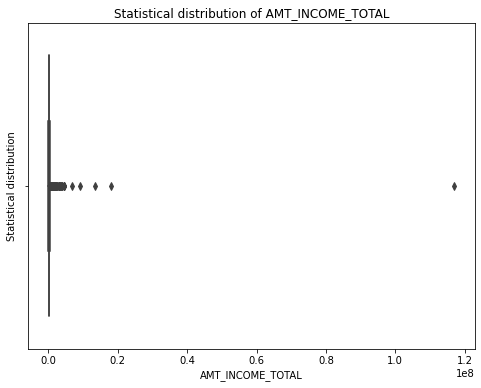

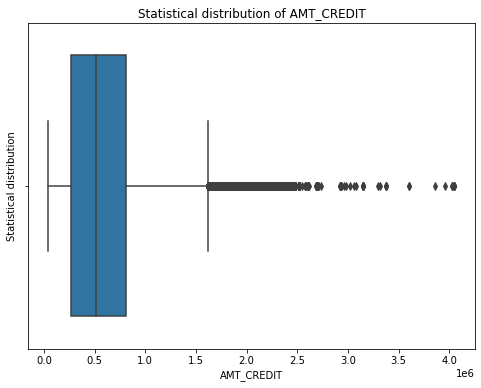

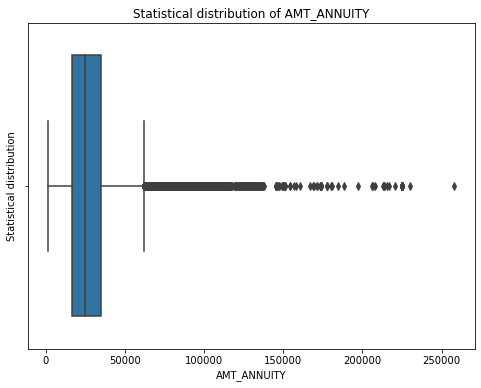

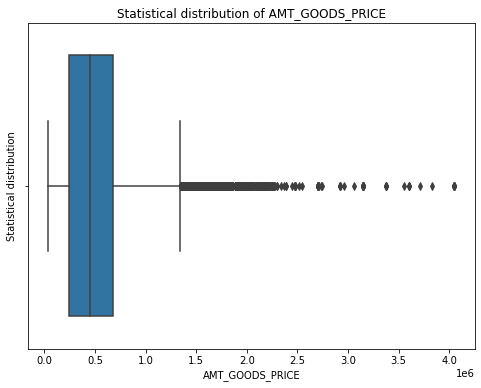

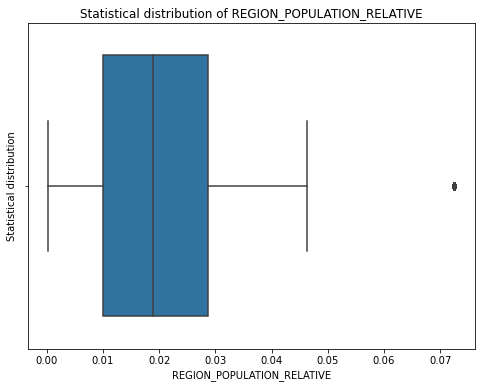

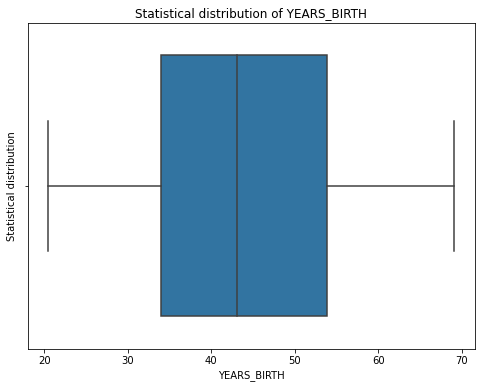

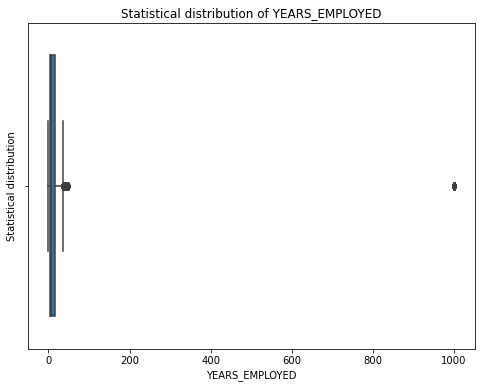

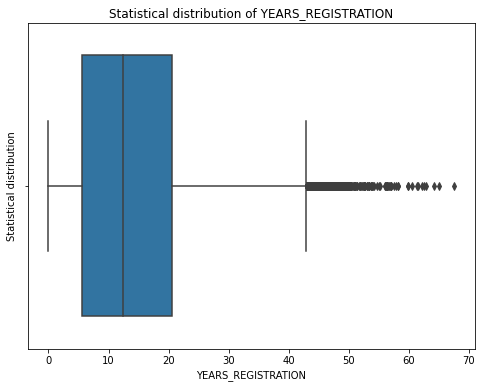

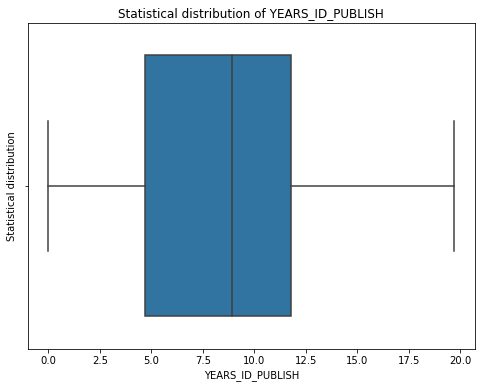

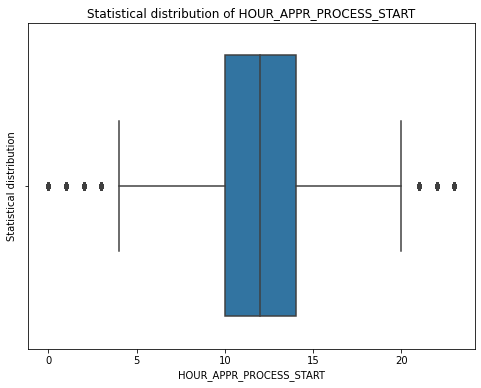

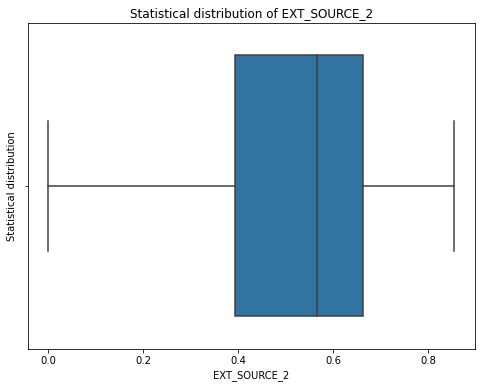

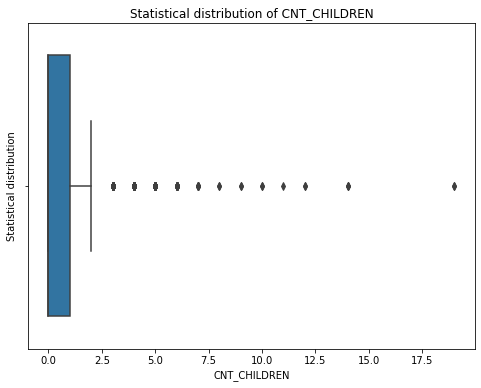

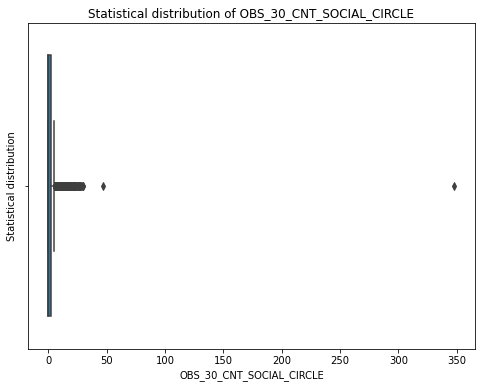

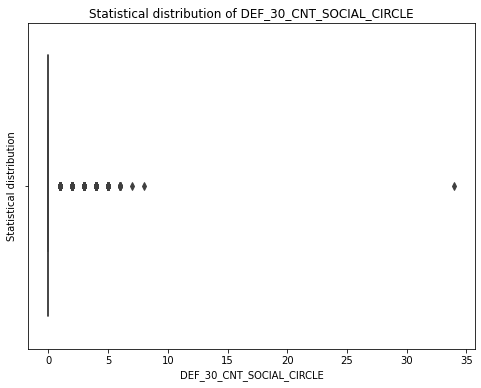

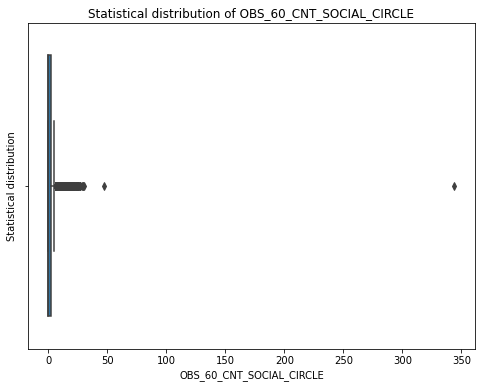

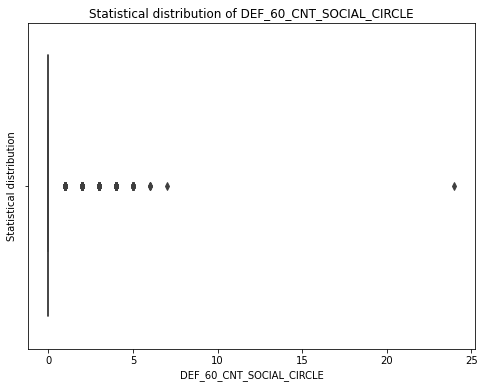

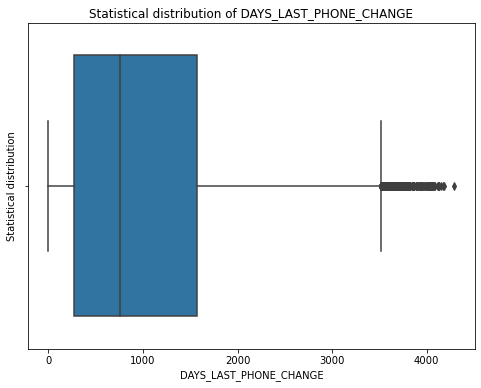

In [62]:
for i in num_cols:
    plt.figure(figsize=[8,6])
    sns.boxplot(ad[i])
    plt.title("Statistical distribution of " + i)
    plt.xlabel(i)
    plt.ylabel("Statistical distribution")
    plt.show()
   

#### Points to be noted:

1.In AMT_INCOME_TOTAL column which tells us the income of the client, there is one value around 120 Million, which is far away     from the other values, so  this is an outlier.  
2.In YEARS_EMPLOYED column which tells how many years before the application the person started current employment. We observe a   value which is greater that 1000 years which is surely an outlier in real case scenario.  
3.In AMT_ANNUITY column there is an outlier.  
4.In CNT_CHILDREN column which tells us the no. if children clients has, some values are beyond 12 which is impossible in         general scenario, therefore its an outlier.

#### Dividing the dataset into two different datasets based on "TARGET" variable

In [63]:
target0 = ad.loc[ad.TARGET == 0]
target1 = ad.loc[ad.TARGET == 1]

## Univariate Analysis

###  Analysis of Categorical variable

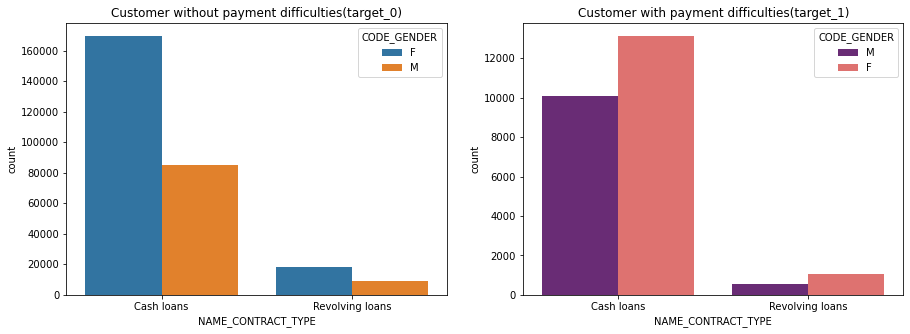

In [64]:
#Analysis on contract type column

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = target0,hue="CODE_GENDER")
plt.title("Customer without payment difficulties(target_0)")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = target1,hue="CODE_GENDER",palette="magma")
plt.title("Customer with payment difficulties(target_1)")

plt.show()

#### Points to be concluded:

1.For both type of customers i.e. defaulters or non-defaulters, people with cash loans are higher.  
2.Female counts are higher than male, for both customers.  


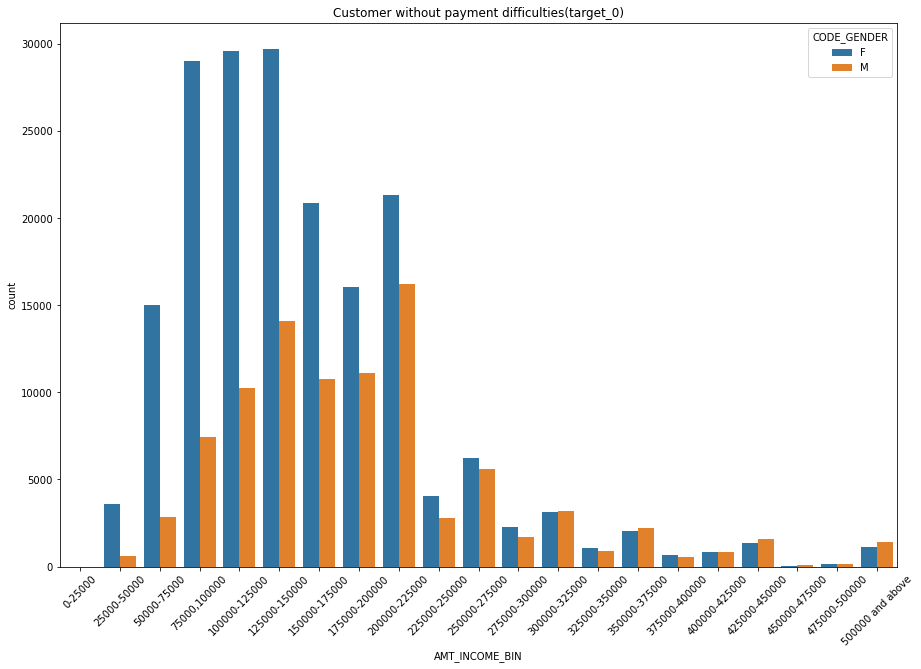

In [65]:
#Analysis on  AMT_INCOME_BIN column

plt.figure(figsize=[15,10])

sns.countplot(x = 'AMT_INCOME_BIN', data = target0,hue="CODE_GENDER")
plt.title("Customer without payment difficulties(target_0)")
plt.xticks(rotation=45)


plt.show()

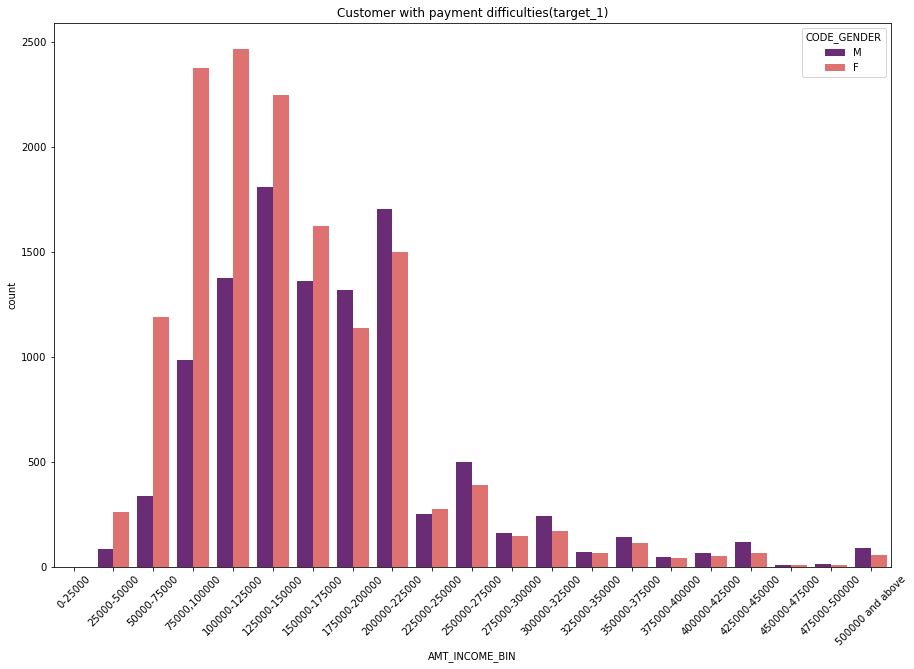

In [66]:
plt.figure(figsize=[15,10])

sns.countplot(x = 'AMT_INCOME_BIN', data = target1,hue="CODE_GENDER",palette="magma")
plt.title("Customer with payment difficulties(target_1)")
plt.xticks(rotation=45)

plt.show()

#### Points to be concluded:

1.For both type of customers i.e. defaulters or non-defaulters, count of people with income range 100000-250000 are higher.    
2.Female counts are higher than male, for both customers.  


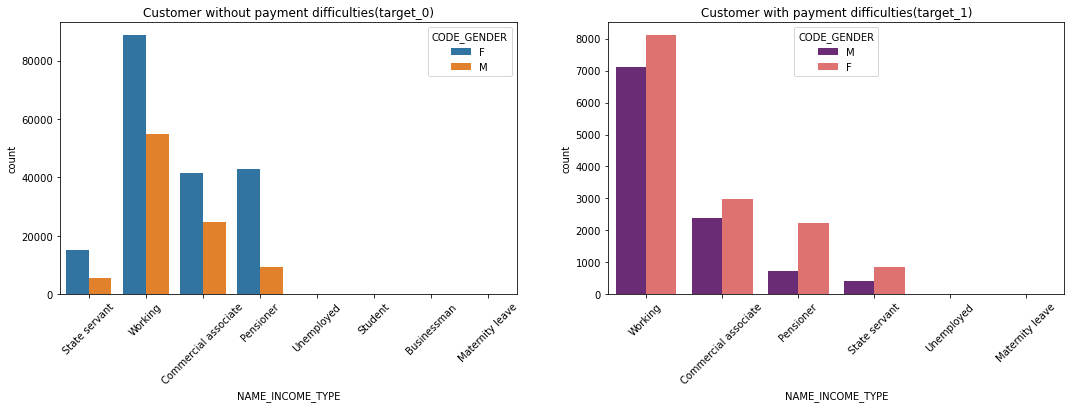

In [67]:
#Analysis on NAME_INCOME_TYPE column

plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = target0,hue="CODE_GENDER")
plt.title("Customer without payment difficulties(target_0)")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = target1,hue="CODE_GENDER",palette="magma")
plt.title("Customer with payment difficulties(target_1)")
plt.xticks(rotation=45)

plt.show()

#### Points to be concluded:

1.Working & commercial associate are higher than others.  
2.Female counts are higher than male.  
3.Less number of credits for  student and Maternity leave.


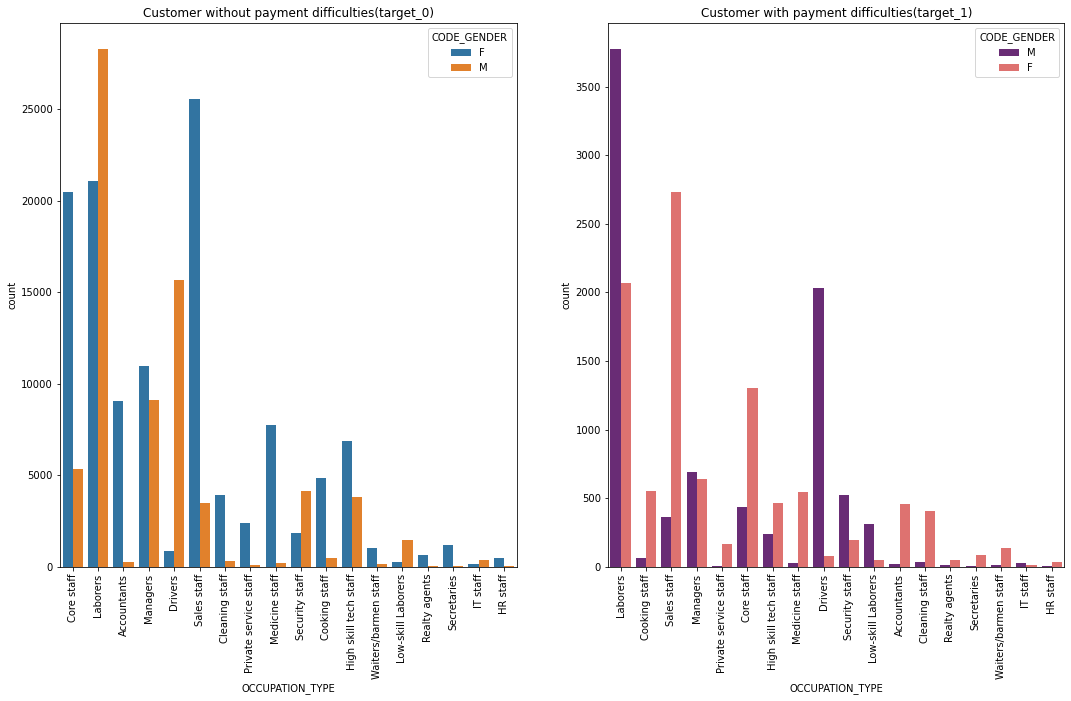

In [68]:
#Analysis on OCCUPATION_TYPE column

plt.figure(figsize=[18,10])

plt.subplot(1,2,1)
sns.countplot(x = 'OCCUPATION_TYPE', data = target0,hue="CODE_GENDER")
plt.title("Customer without payment difficulties(target_0)")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = 'OCCUPATION_TYPE', data = target1,hue="CODE_GENDER",palette="magma")
plt.title("Customer with payment difficulties(target_1)")
plt.xticks(rotation=90)

plt.show()

#### Points to be concluded:

1.Laborers,sales staff and core staff poeple are taking loan.  
2.In labour occupation, male counts is more then female.    
3.Secretaries, HR and IT staff counts are very minimal.

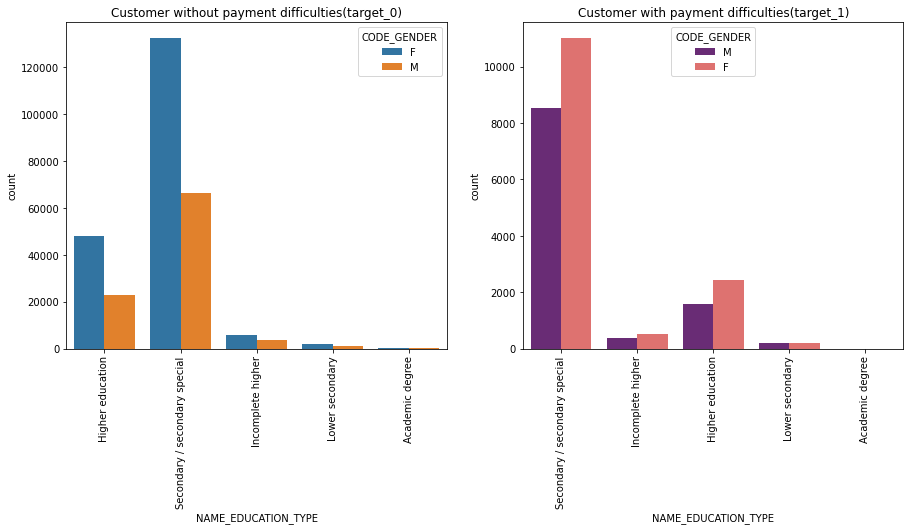

In [69]:
#Analysis on NAME_EDUCATION_TYPE column

plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = target0,hue="CODE_GENDER")
plt.title("Customer without payment difficulties(target_0)")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = target1,hue="CODE_GENDER",palette="magma")
plt.title("Customer with payment difficulties(target_1)")
plt.xticks(rotation=90)

plt.show()

#### Points to be concluded:

1.Secondary education people counts are more.    
2.Lower secondary and academic degree people are very less.      
3.Female again leading the count.

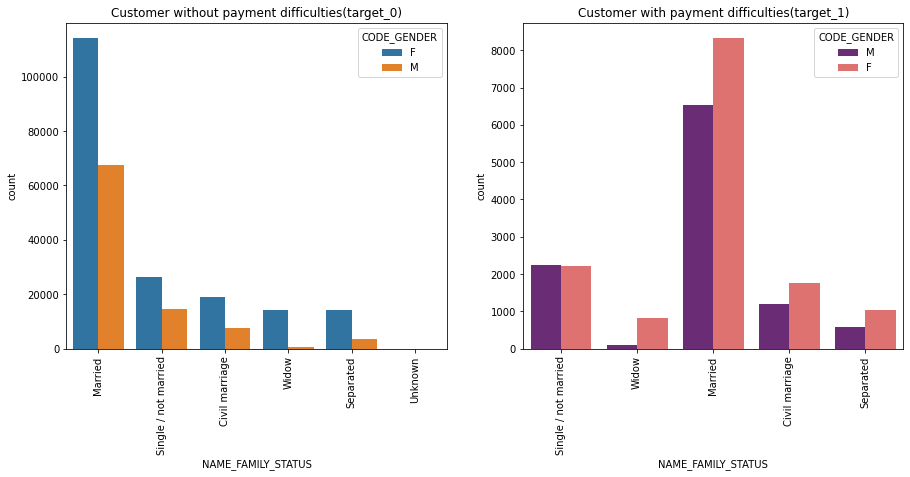

In [70]:
#Analysis on NAME_FAMILY_STATUS column

plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = target0,hue="CODE_GENDER")
plt.title("Customer without payment difficulties(target_0)")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = target1,hue="CODE_GENDER",palette="magma")
plt.title("Customer with payment difficulties(target_1)")
plt.xticks(rotation=90)

plt.show()

#### Points to be concluded:

1.Married people counts are higher.    
2.Separated and widow people are very less.      
3.Females again leading the count.

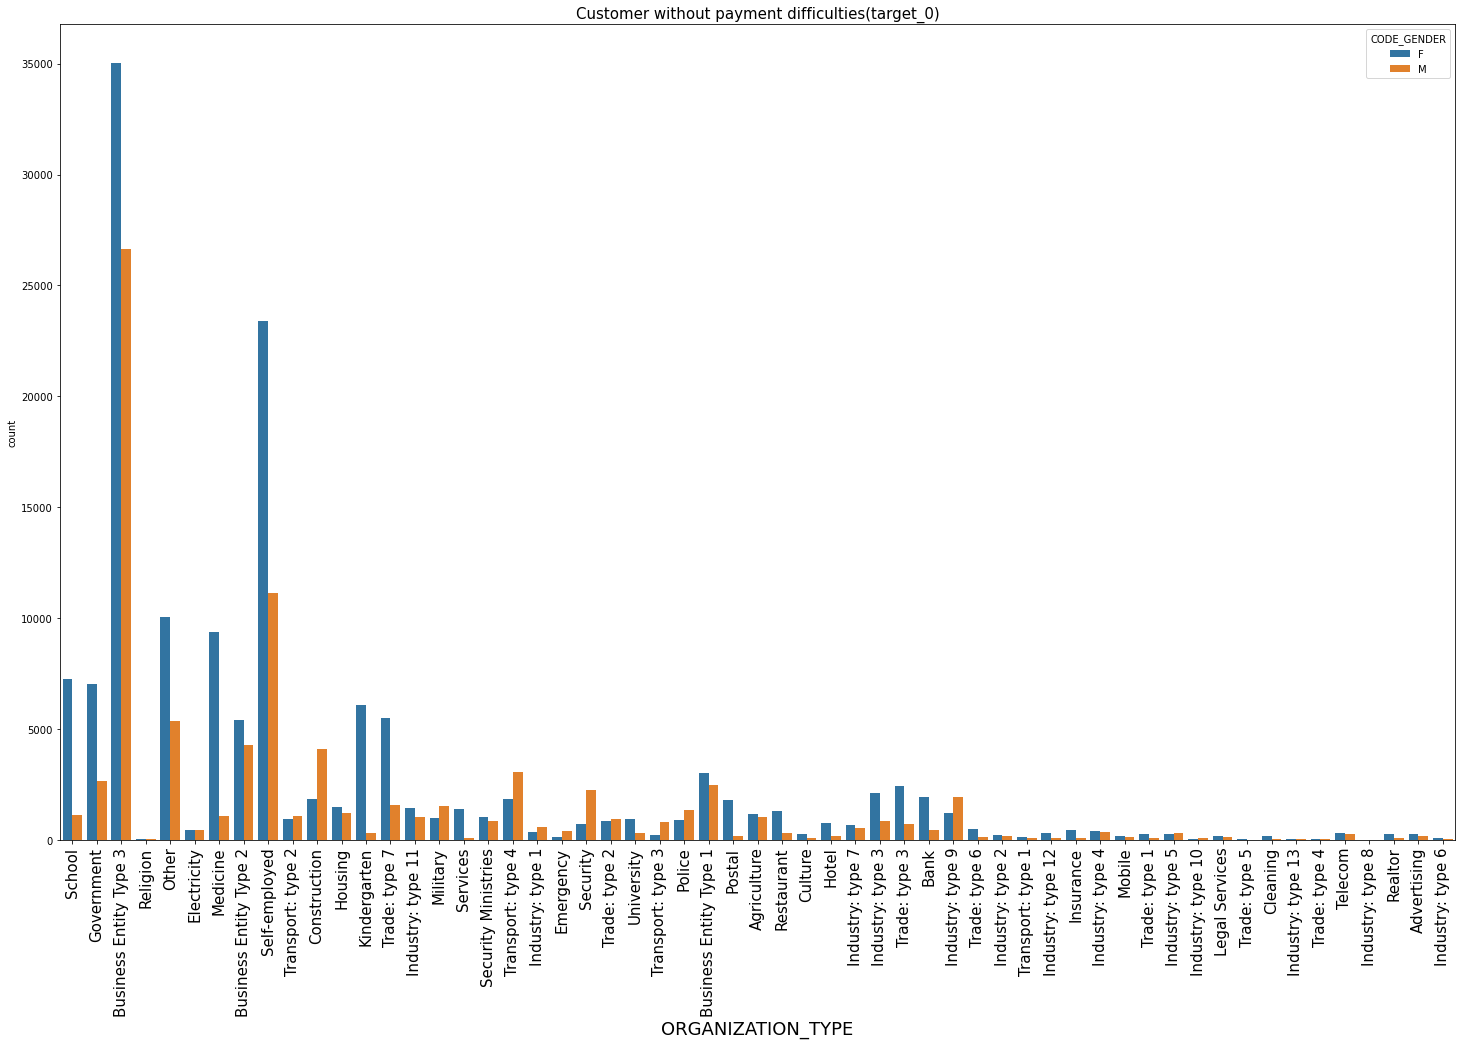

In [71]:
#Analysis on ORGANIZATION_TYPE column

plt.figure(figsize=[25,15])

sns.countplot(x = 'ORGANIZATION_TYPE', data = target0,hue="CODE_GENDER")
plt.title("Customer without payment difficulties(target_0)", fontsize=15)
plt.xlabel("ORGANIZATION_TYPE", fontsize=18)
plt.xticks(rotation=90, fontsize=15)

plt.show()

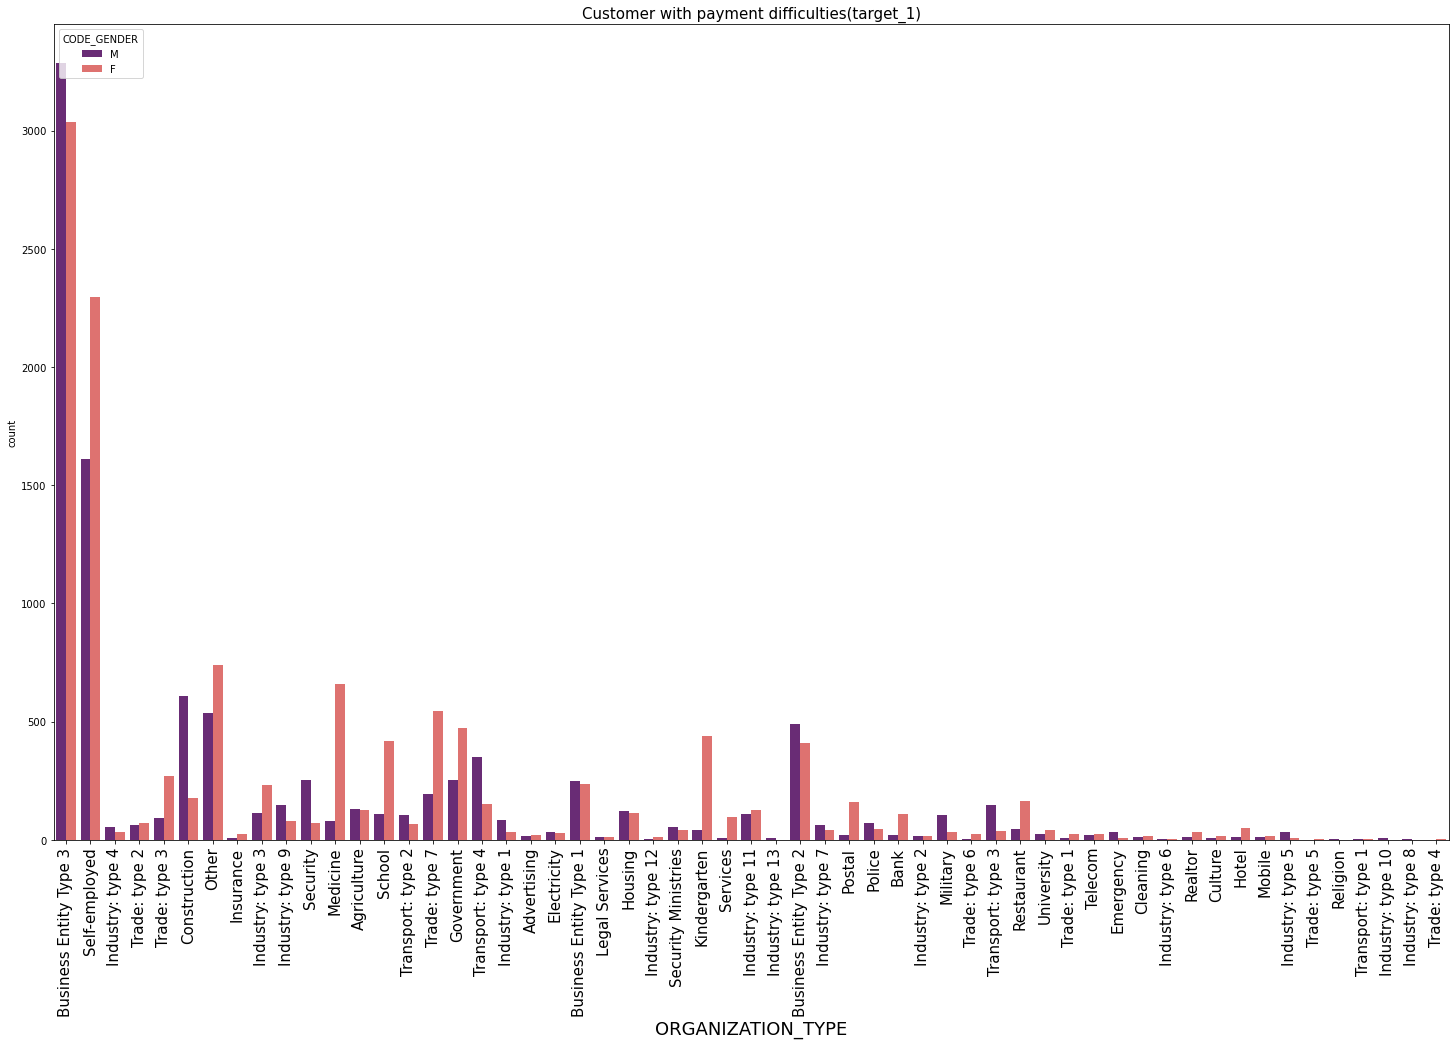

In [72]:
plt.figure(figsize=[25,15])

sns.countplot(x = 'ORGANIZATION_TYPE', data = target1,hue="CODE_GENDER",palette="magma")
plt.title("Customer with payment difficulties(target_1)", fontsize=15)
plt.xlabel("ORGANIZATION_TYPE", fontsize=18)

plt.xticks(rotation=90, fontsize=15)

plt.show()

#### Points to be concluded:

1.Business entity type 3 and self employed people counts are more.    
2.In Business entity type 3 for target_1 male counts are higher than female .      


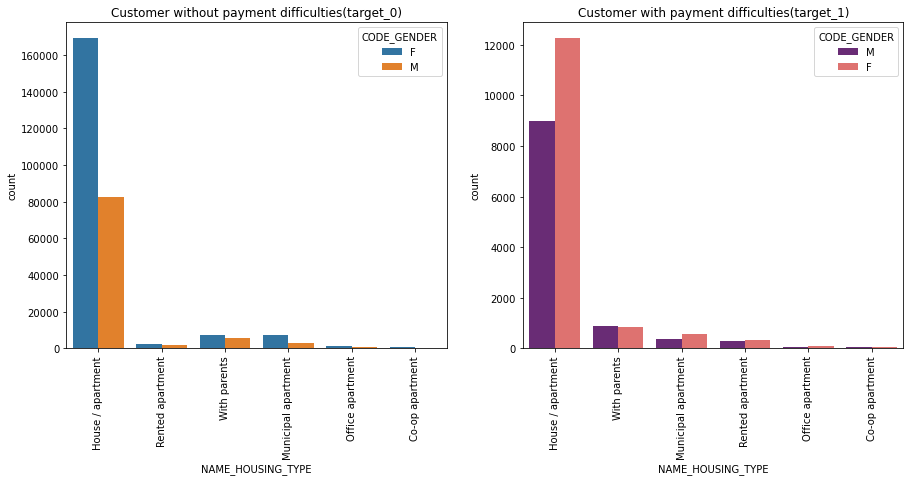

In [222]:
#Analysis on NAME_HOUSING_TYPE column

plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = target0,hue="CODE_GENDER")
plt.title("Customer without payment difficulties(target_0)")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = target1,hue="CODE_GENDER",palette="magma")
plt.title("Customer with payment difficulties(target_1)")
plt.xticks(rotation=90)

plt.show()

#### Points to be concluded:

1.Those who have their own house/apartment are defaulters.      
2.Females are defaulters.

## Bivariate Analysis

### 1.Categorical-Numerical Analysis

#### _Analysis 1_

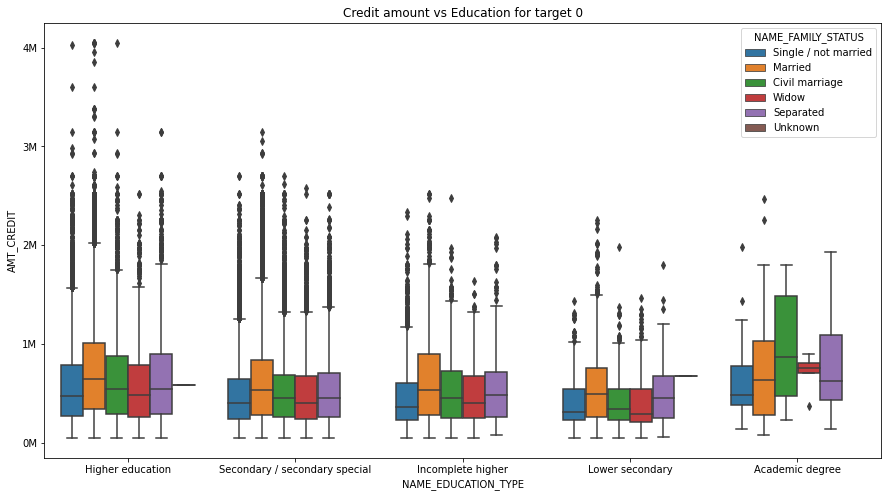

In [73]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties(target0)

plt.figure(figsize=[15,8])
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT',data=target0, hue=ad.NAME_FAMILY_STATUS)
plt.title("Credit amount vs Education for target 0")

ticks = np.arange(0, 5000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)

plt.show()


#### Conclusion:

1.Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits   than others.   
2.Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.     
3.Civil marriage for Academic degree is having most of the credits in the third quartile.

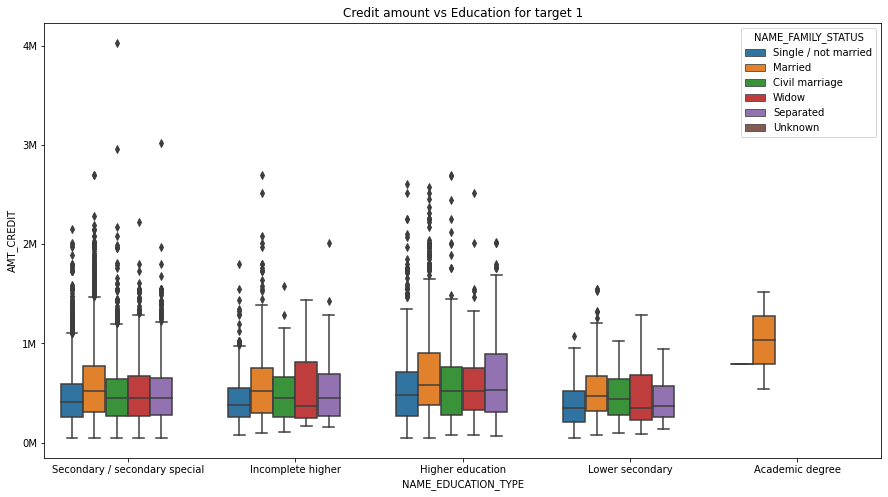

In [74]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan  Payment Difficulties(target1)

plt.figure(figsize=[15,8])
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT',data=target1, hue=ad.NAME_FAMILY_STATUS)
plt.title("Credit amount vs Education for target 1")

ticks = np.arange(0, 5000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)

plt.show()


#### Conclusion:

1. Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and   'separated' of Academic degree education are having higher number of credits than others.  
2. Most of the outliers are from   Education type 'Secondary'.   
3. In Educaion type 'Academic degree' only married people are having difficulty in paying loan

#### _Analysis 2_

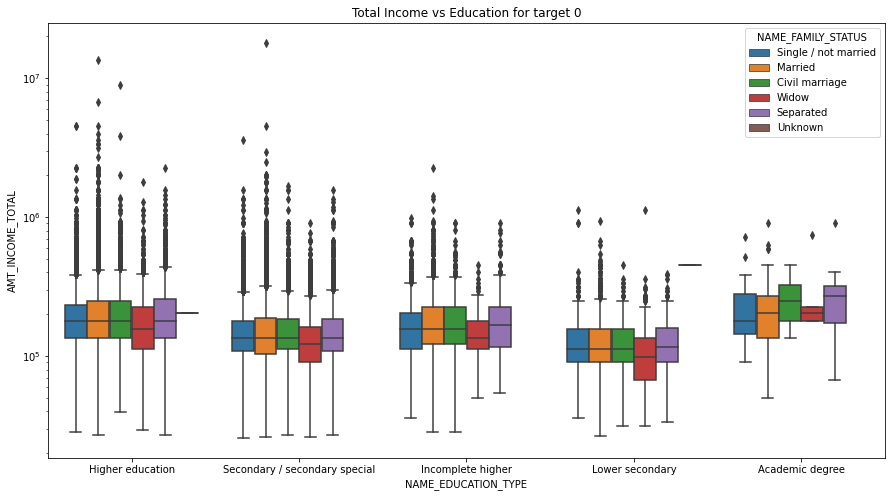

In [75]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_INCOME_TOTAL' for Loan - Non Payment Difficulties(target0)

plt.figure(figsize=[15,8])
plt.yscale('log')
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL',data=target0, hue=ad.NAME_FAMILY_STATUS)
plt.title("Total Income vs Education for target 0")



plt.show()


#### Conclusion:

1.For Education type 'Higher education' the income amount is mostly equal among all family status.It does contain many outliers.   
2.Less outlier are having for Academic degree but there income amount is little higher that Higher education.  
3.Lower secondary of civil marriage family status are have less income amount than others.  
4.Except Widows all family status have same income in 'Higher education','Secondary','Incomplete higher'and'Lower secondary'.  
5.Secondary education also have outliers.

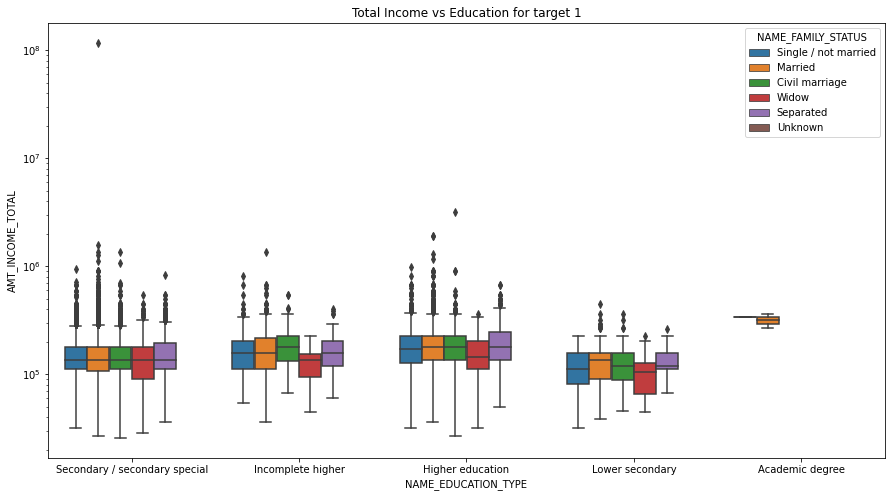

In [76]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_INCOME_TOTAL' for Loan Payment Difficulties(target1)

plt.figure(figsize=[15,8])
plt.yscale('log')
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL',data=target1, hue=ad.NAME_FAMILY_STATUS)
plt.title("Total Income vs Education for target 1")



plt.show()

#### Conclusion:

1.Have some similarity with Target0,for Education type 'Higher education'the income amount is mostly equal with family status.  
2.No outlier for Academic degree but there income amount is little higher that Higher education.  
3.Lower secondary are having less income amount than others.  
4.Except Widows all family status have same income in 'Higher education','Incomplete higher'and'Lower secondary'.  
5.Outliers in 'Secondary' and 'Higher education'.


#### _Analysis 3_

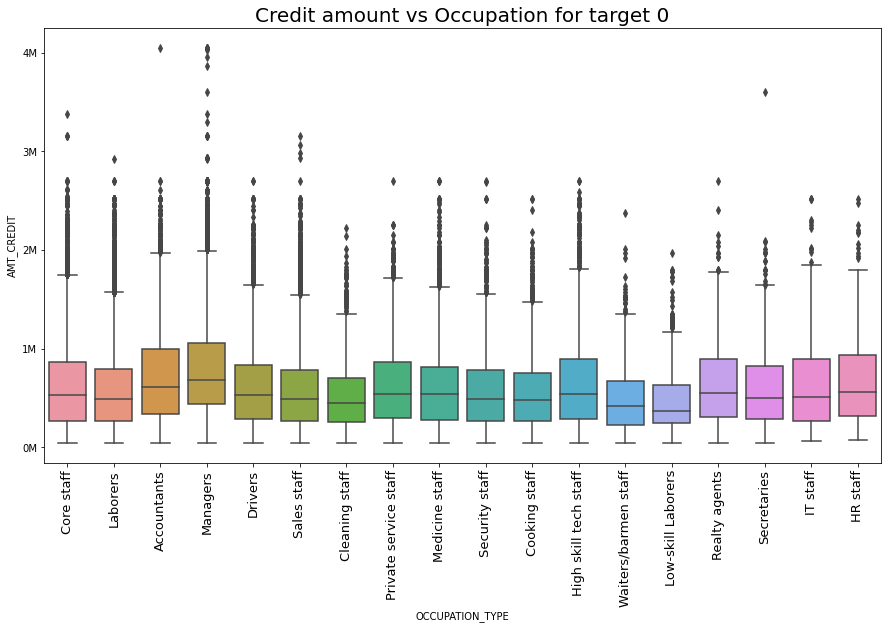

In [77]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan non- Payment Difficulties(target0)

plt.figure(figsize=[15,8])
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_CREDIT',data=target0)
plt.title("Credit amount vs Occupation for target 0", fontsize=20)

ticks = np.arange(0, 5000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=90,fontsize=13)

plt.show()

#### Conclusion:

1.Accountants,Managers, realty agents and HR staff credited more amount than others.  
2.Low skill laborers and waiters credited less amount.  
3.Core staff, accountants and secretaries have outliers.  

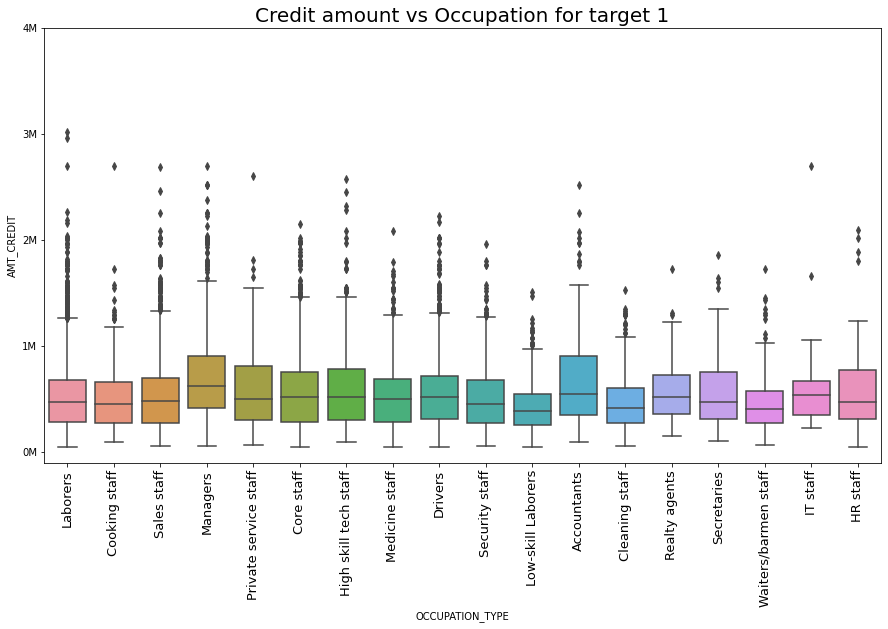

In [78]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan Payment Difficulties(target1)

plt.figure(figsize=[15,8])
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_CREDIT',data=target1)
plt.title("Credit amount vs Occupation for target 1", fontsize=20)

ticks = np.arange(0, 5000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=90,fontsize=13)

plt.show()

#### Conclusion:

1.Accountants,Managers and HR staff had difficulty in payment because they credited more amount than others.    
2.Low skill laborers,cleaning staff and waiters credited less amount.    
3.Laborers, cooking staff, private service staff and IT staff have outliers.  

### 2.Numerical-Numerical Analysis

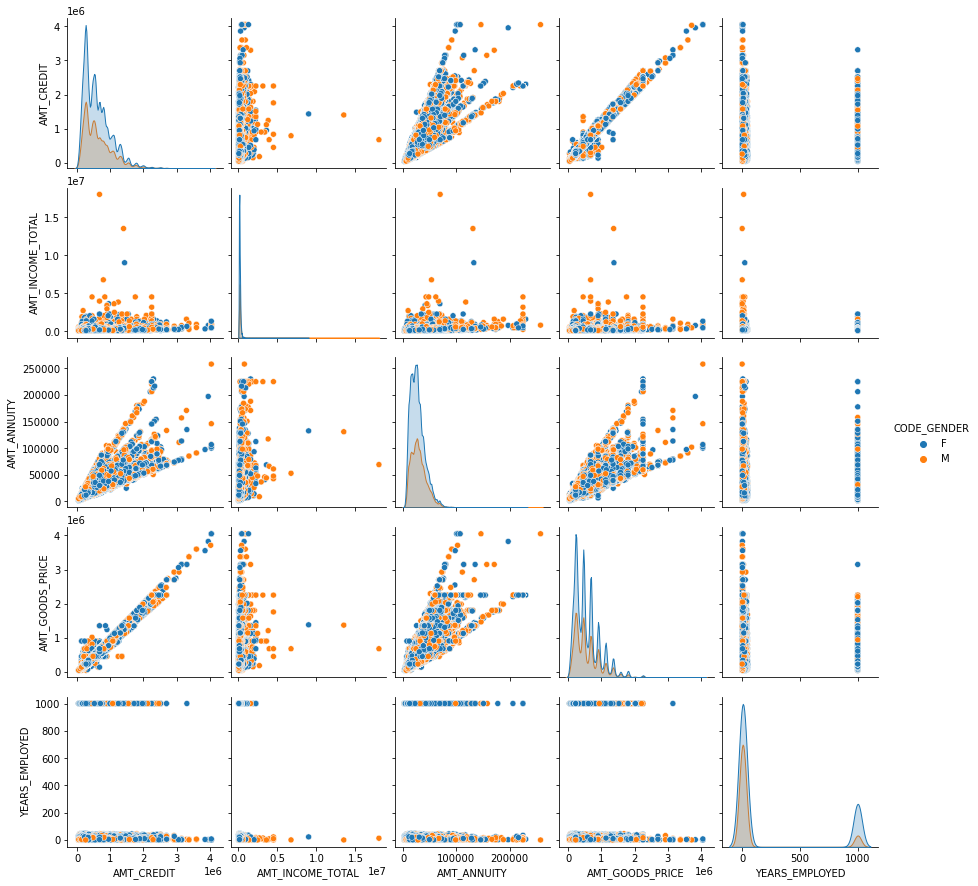

In [79]:
#Pairplot for Target 0 (Loan-Non Payment Difficulties)

sns.pairplot(target0, vars = ["AMT_CREDIT","AMT_INCOME_TOTAL","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_EMPLOYED"],
              hue="CODE_GENDER")

plt.show()

#### Conclusion:

1.Those who have less total income credited all amount from starting to maximum.some people who have very high income credited less, so it may count as   
an outlier and mostly are males.  
2.Loan annuity and credit amount has a linear relationship.Those who have less credit limit has less loan annuity.It has few outliers.  
3.Price of goods for which loan is given has a linear relationship with credit amount.  
4.In years_employed and amt_credit graph few has 1000 year of employement so that makes no sense in real life.That is outliers for sure.Mostly females have credited the loan.  


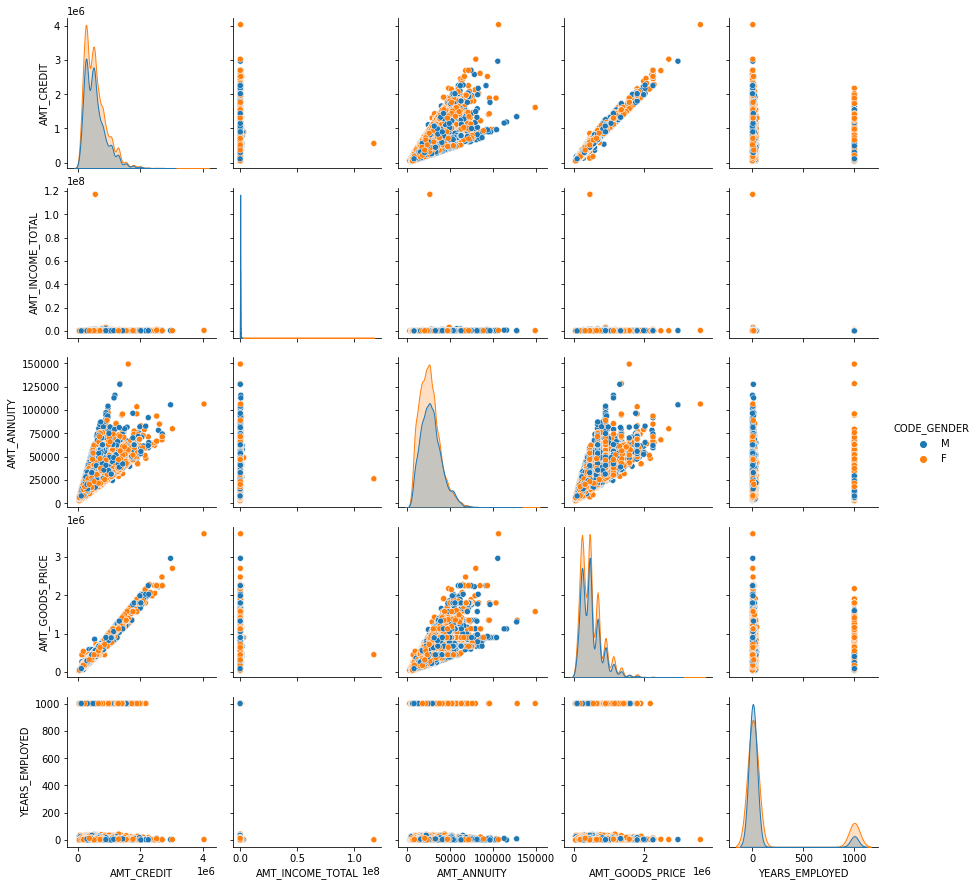

In [80]:
#Pairplot for Target 1 (Loan-Payment Difficulties)

sns.pairplot(target1, vars = ["AMT_CREDIT","AMT_INCOME_TOTAL","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_EMPLOYED"],
             hue="CODE_GENDER")

plt.show()

#### Conclusion:

1.Same as target 0,those who have less total income credited all amount from starting to maximum.one customer who has very high income credited less, so it may count as an outlier.      
2.Loan annuity and credit amount has a linear relationship.Those who have less credit limit has less loan annuity.It has few outliers.    
3.Price of goods for which loan is given has a linear relationship with credit amount.    
4.In years_employed and amt_credit graph few has 1000 year of employement so that makes no sense in real life.That is outliers for sure.Mostly females have credited the loan.  

### 3.Categorical-Categorical Analysis

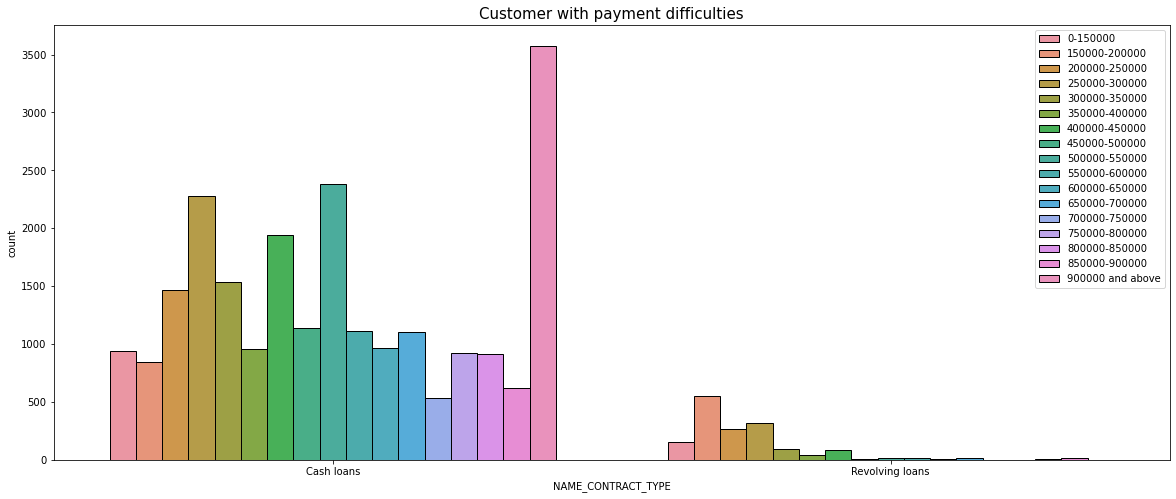

In [81]:
plt.figure(figsize=(20,8)) 

sns.countplot(data=target1,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_BIN', edgecolor="black")
plt.title('Customer with payment difficulties',fontsize=15)
plt.legend(loc='upper right')

plt.show()

#### Conclusion:

1.Customers credited more on cash loans than revolving loans has payment difficulties.  
2.Those who have credited 900000 and above has more difficulty on paying.

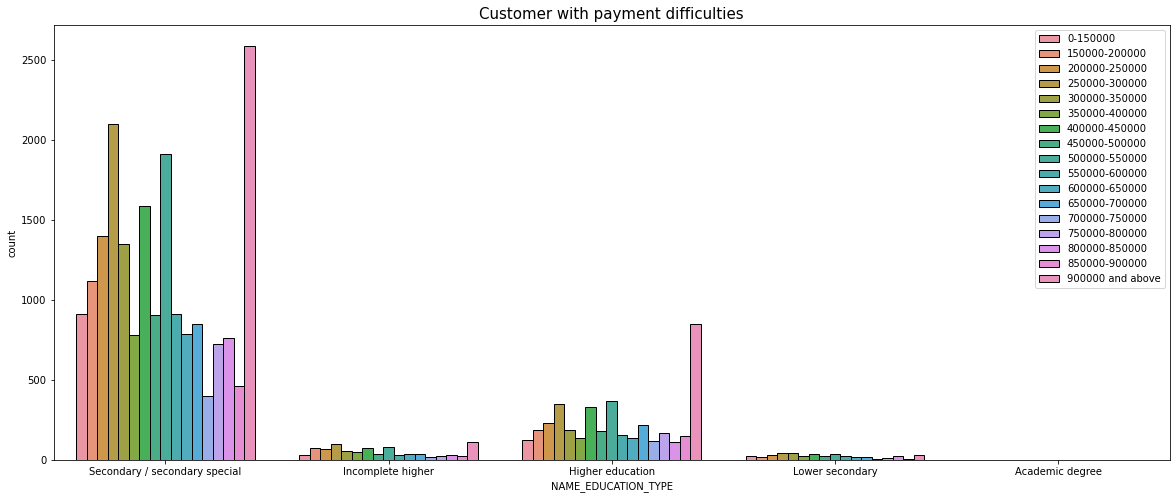

In [82]:
plt.figure(figsize=(20,8)) 

sns.countplot(data=target1,x='NAME_EDUCATION_TYPE',hue='AMT_CREDIT_BIN', edgecolor="black")
plt.title('Customer with payment difficulties',fontsize=15)
plt.legend(loc='upper right')

plt.show()

#### Conclusion:

1.Among the NAME_EDUCATION_TYPE , Secondary educators having difficulties paying.      
2.In Secondary educators  customers, those who have done 900k and above credit having more difficulty.

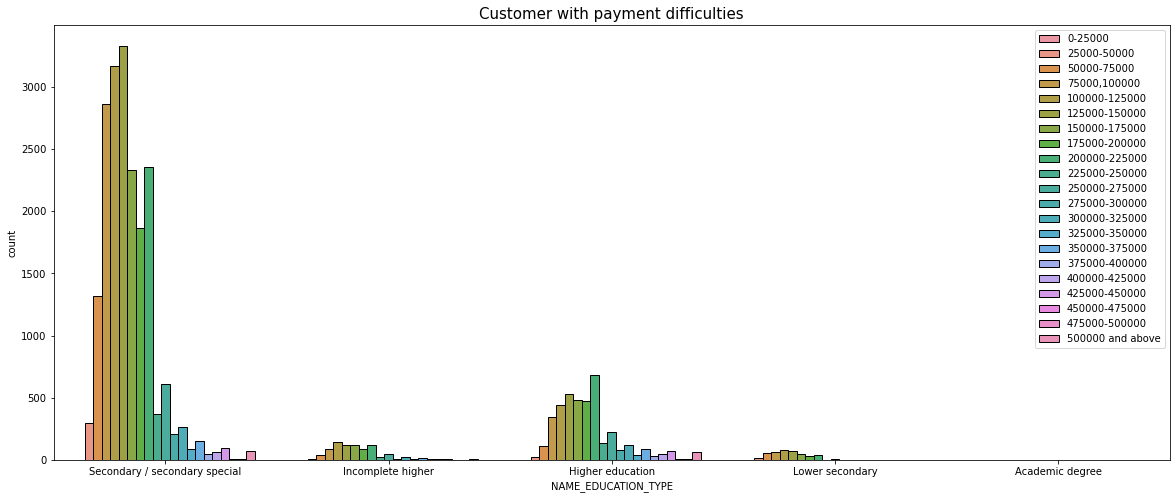

In [83]:
plt.figure(figsize=(20,8)) 

sns.countplot(data=target1,x='NAME_EDUCATION_TYPE',hue='AMT_INCOME_BIN', edgecolor="black")
plt.title('Customer with payment difficulties',fontsize=15)
plt.legend(loc='upper right')

plt.show()

#### Conclusion:

1.Among the NAME_EDUCATION_TYPE , Secondary educators having difficulties paying.      
2.In Secondary educators  customers, those who are having total income between 50k-200k having more difficulty.

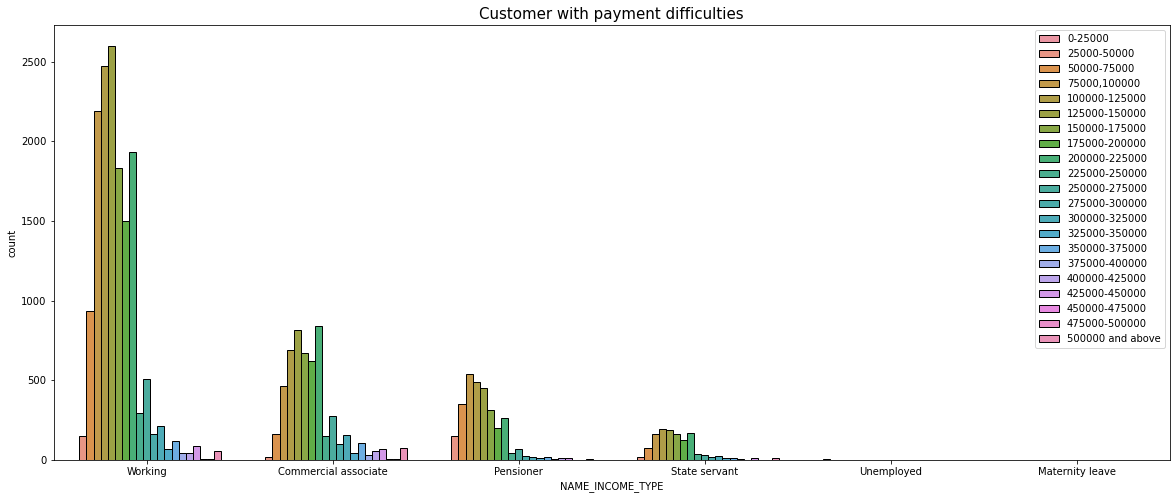

In [84]:
plt.figure(figsize=(20,8)) 

sns.countplot(data=target1,x='NAME_INCOME_TYPE',hue='AMT_INCOME_BIN', edgecolor="black")
plt.title('Customer with payment difficulties',fontsize=15)
plt.legend(loc='upper right')

plt.show()

#### Conclusion:

1.Among the INCOME_TYPE , Working having difficulties paying.    
2.In Working customers, those who are having total income between 50k-200k having more difficulty.

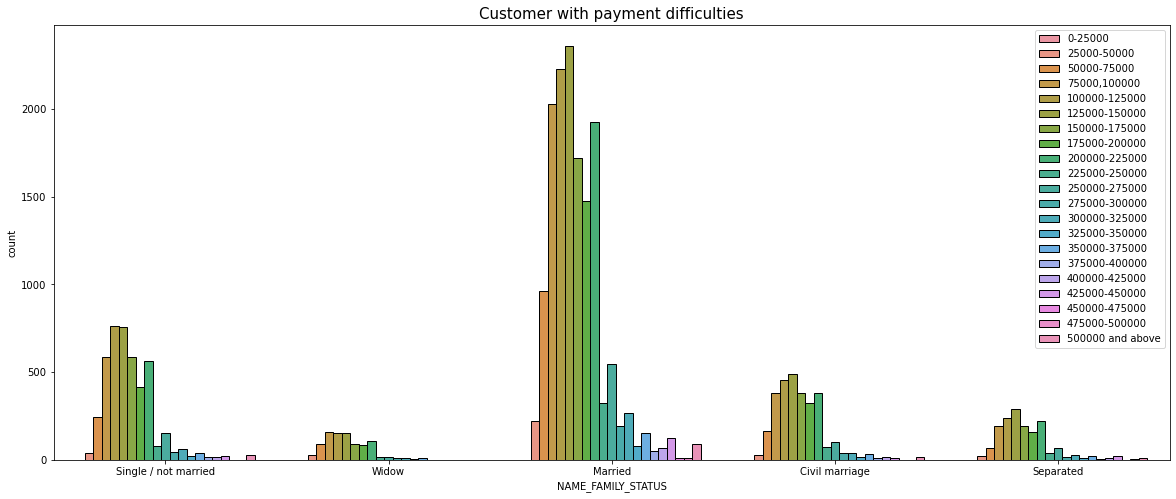

In [85]:
plt.figure(figsize=(20,8)) 

sns.countplot(data=target1,x='NAME_FAMILY_STATUS',hue='AMT_INCOME_BIN', edgecolor="black", orient="h")
plt.title('Customer with payment difficulties',fontsize=15)
plt.legend(loc='upper right')

plt.show()

#### Conclusion:

1.Among the NAME_FAMILY_STATUS , Married people having difficulties paying.      
2.In Married customers, those who are having total income between 50k-200k having more difficulty.

## Multivariate Analysis

#### Heatmap

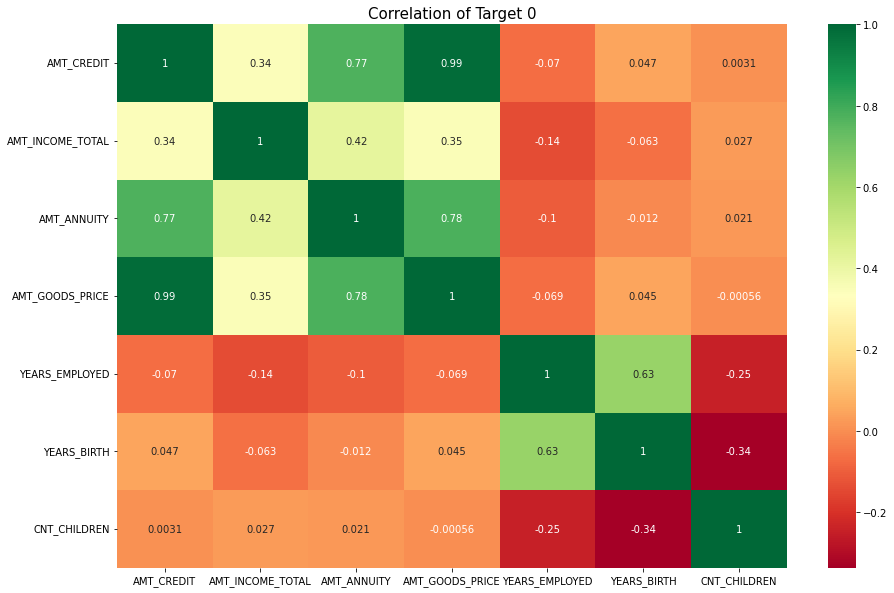

In [86]:
# For target 0 heatmap correlation.

plt.figure(figsize=[15,10])
sns.heatmap(target0[["AMT_CREDIT","AMT_INCOME_TOTAL","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_EMPLOYED",
                     "YEARS_BIRTH","CNT_CHILDREN"]].corr(), annot=True, cmap="RdYlGn")
            
plt.title('Correlation of Target 0', fontsize=15)

plt.show()

#### Conclusion:

1.As we have seen earlier in bivariate analysis,amount annuity and credit amount has a good linear relationship.      
2.Price of goods for which loan is given has a good linear relationship with credit amount.      
3.years_employed and amt_credit dose not have a good linear relatioship.  
4.Loan annuity and goods price has a good linear relationship.  
5.Credit amount having inverse linear relationship with number of children client have, means Credit amount is higher for less children count client have and vice-versa.  
6.Income amount having inverse linear relationship with number of children client have, means more income for less children client have and vice-versa.


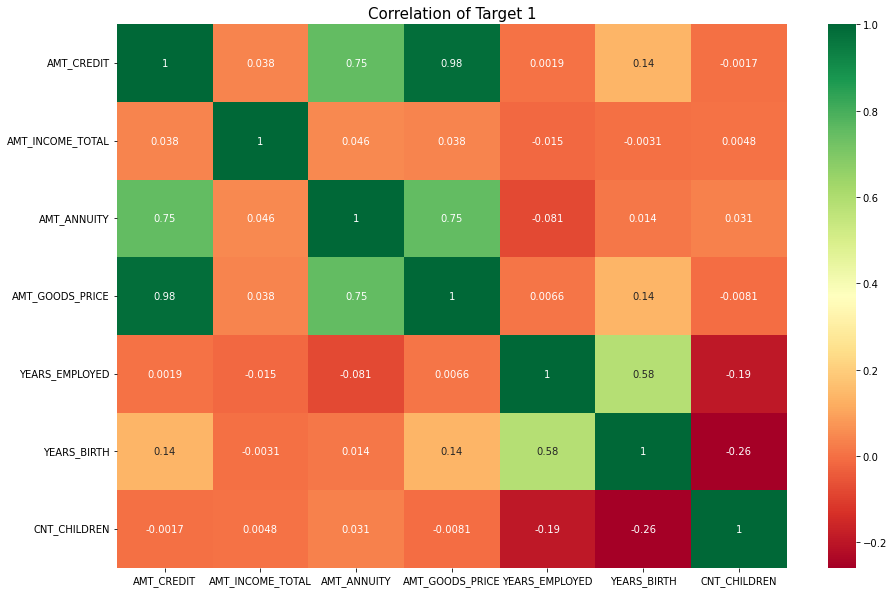

In [87]:
# For target 1 heatmap correlation.

plt.figure(figsize=[15,10])
sns.heatmap(target1[["AMT_CREDIT","AMT_INCOME_TOTAL","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_EMPLOYED",
                     "YEARS_BIRTH","CNT_CHILDREN"]].corr(), annot=True, cmap="RdYlGn")
            
plt.title('Correlation of Target 1', fontsize=15)

plt.show()

#### Conclusion:

1.As we have seen earlier in bivariate analysis,amount annuity and credit amount has a good linear relationship.      
2.Price of goods for which loan is given has a good linear relationship with credit amount.      
3.years_employed and amt_credit dose not have a good linear relatioship.  
4.Loan annuity and goods price has a good linear relationship.  
5.Here total income with loan annuity & goods price does not have a good linear relationship.  
6.Credit amount having inverse linear relationship with number of children client have, means Credit amount is higher for less children count client have and vice-versa.    
7.Income amount having inverse linear relationship with number of children client have, means more income for less children client have and vice-versa.

## Previous Application data

In [88]:
# Load the dataset

pa = pd.read_csv("previous_application.csv")

In [89]:
#Check the first five rows

pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#check the shape

pa.shape

(1670214, 37)

### Data Handling and Cleaning

In [91]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### _All data types are right, no need to change anyone._ 

#### Missing value treatment

In [92]:
pa.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [93]:
#checking null values in percentage

pa.isnull().sum()/len(pa)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Check unique values of each column

In [94]:
for col in pa.columns:
    print(col)
    print("=============================================")
    print(pa[col].unique())
    print("..............................................")

SK_ID_PREV
[2030495 2802425 2523466 ... 2659632 2785582 2418762]
..............................................
SK_ID_CURR
[271877 108129 122040 ... 253940 353284 191629]
..............................................
NAME_CONTRACT_TYPE
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
..............................................
AMT_ANNUITY
[ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
..............................................
AMT_APPLICATION
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
..............................................
AMT_CREDIT
[ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
..............................................
AMT_DOWN_PAYMENT
[    0.        nan 12649.5  ...  4099.95 55325.25 50476.5 ]
..............................................
AMT_GOODS_PRICE
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
..............................................
WEEKDAY_APPR_PROCESS_START
['

[ 300.  916.   59. ... 1878. 2016. 1760.]
..............................................
DAYS_LAST_DUE
[-4.20000e+01  3.65243e+05 -1.82000e+02 ... -2.86700e+03 -2.86600e+03
 -2.83300e+03]
..............................................
DAYS_TERMINATION
[-3.70000e+01  3.65243e+05 -1.77000e+02 ... -2.82800e+03 -2.87000e+03
 -2.81500e+03]
..............................................
NFLAG_INSURED_ON_APPROVAL
[ 0.  1. nan]
..............................................


#### Some columns have "XNA" and "XAP" as the values, so replace them with np.NaN

In [95]:
pa.replace("XNA", np.NaN, inplace=True)
pa.replace("XAP", np.NaN, inplace=True)

In [96]:
#checking the percentage missing values again

pa.isnull().sum()/len(pa)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.020716
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE         95.830774
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE              37.563091
CODE_REJECT_REASON             81.327123
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.116213
NAME_GOODS_CATEGORY            56.927376
NAME_PORTFOLIO                 22.286366
NAME_PRODUCT_TYP

In [97]:
# dropping column which has more than 30% null values

pa.drop(pa.columns[pa.isnull().sum()/pa.shape[0]*100 > 30], axis=1, inplace=True)

In [98]:
# Re-checking the shape

pa.shape

(1670214, 19)

In [99]:
#checking again null values after removing columns

pa.isnull().sum()/len(pa)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.020716
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_CLIENT_TYPE                0.116213
NAME_PORTFOLIO                 22.286366
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
dtype: float64

In [100]:
# Remove some unwanted columns

pa.drop(columns=["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY",
                  "SELLERPLACE_AREA"], axis=1, inplace=True)

In [101]:
pa.shape

(1670214, 14)

##### Checking missing values row wise

In [102]:
#checking for missing value percentage row wise if 50% columns have missing values

len(pa[pa.isnull().sum(axis=1)/len(pa.columns)*100 >= 50].index)

0

###### Removing missing values of AMT_ANNUITY, AMT_GOODS_PRICE, CNT_PAYMENT row-wise

In [103]:
len(pa[np.isnan(pa["AMT_ANNUITY"])  &  np.isnan(pa["AMT_GOODS_PRICE"])  &  np.isnan(pa["CNT_PAYMENT"])])

333855

In [104]:
# Removing above no. of rows because its not large as compared to original dataset

pa = pa[~(np.isnan(pa["AMT_ANNUITY"])  &  np.isnan(pa["AMT_GOODS_PRICE"])  &  np.isnan(pa["CNT_PAYMENT"]))]

In [105]:
# final shape of dataset

pa.shape

(1336359, 14)

In [106]:
# checking missing value percentage

pa.isnull().sum()/len(pa)*100

SK_ID_PREV              0.000000
SK_ID_CURR              0.000000
NAME_CONTRACT_TYPE      0.000000
AMT_ANNUITY             2.871983
AMT_APPLICATION         0.000000
AMT_CREDIT              0.000075
AMT_GOODS_PRICE         3.865728
NAME_CONTRACT_STATUS    0.000000
DAYS_DECISION           0.000000
NAME_CLIENT_TYPE        0.070041
NAME_PORTFOLIO          2.871609
CHANNEL_TYPE            0.000000
CNT_PAYMENT             2.871609
PRODUCT_COMBINATION     0.000000
dtype: float64

In [107]:
pa.isnull().sum()

SK_ID_PREV                  0
SK_ID_CURR                  0
NAME_CONTRACT_TYPE          0
AMT_ANNUITY             38380
AMT_APPLICATION             0
AMT_CREDIT                  1
AMT_GOODS_PRICE         51660
NAME_CONTRACT_STATUS        0
DAYS_DECISION               0
NAME_CLIENT_TYPE          936
NAME_PORTFOLIO          38375
CHANNEL_TYPE                0
CNT_PAYMENT             38375
PRODUCT_COMBINATION         0
dtype: int64

In [108]:
#filling categorical column with mode

pa.NAME_CLIENT_TYPE.value_counts()

Repeater     921412
New          297891
Refreshed    116120
Name: NAME_CLIENT_TYPE, dtype: int64

In [109]:
pa.NAME_CLIENT_TYPE.mode()[0]

'Repeater'

In [110]:
# fill the NA value with mode

pa.NAME_CLIENT_TYPE.fillna(pa.NAME_CLIENT_TYPE.mode()[0], inplace=True)

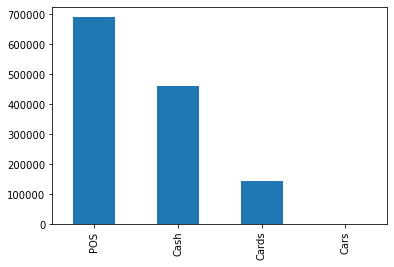

In [111]:
pa["NAME_PORTFOLIO"].value_counts().plot.bar()
plt.show()

In [112]:
pa.isnull().sum()/len(pa)*100

SK_ID_PREV              0.000000
SK_ID_CURR              0.000000
NAME_CONTRACT_TYPE      0.000000
AMT_ANNUITY             2.871983
AMT_APPLICATION         0.000000
AMT_CREDIT              0.000075
AMT_GOODS_PRICE         3.865728
NAME_CONTRACT_STATUS    0.000000
DAYS_DECISION           0.000000
NAME_CLIENT_TYPE        0.000000
NAME_PORTFOLIO          2.871609
CHANNEL_TYPE            0.000000
CNT_PAYMENT             2.871609
PRODUCT_COMBINATION     0.000000
dtype: float64

In [113]:
## Checking statistics info

pa[["AMT_ANNUITY","AMT_GOODS_PRICE","CNT_PAYMENT"]].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
count,1.297979e+06,1.284699e+06,1.297984e+06
mean,1.595512e+04,2.278473e+05,1.605408e+01
std,1.478214e+04,3.153966e+05,1.456729e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.321780e+03,5.084100e+04,6.000000e+00
50%,1.125000e+04,1.123200e+05,1.200000e+01
75%,2.065842e+04,2.340000e+05,2.400000e+01
max,4.180581e+05,6.905160e+06,8.400000e+01


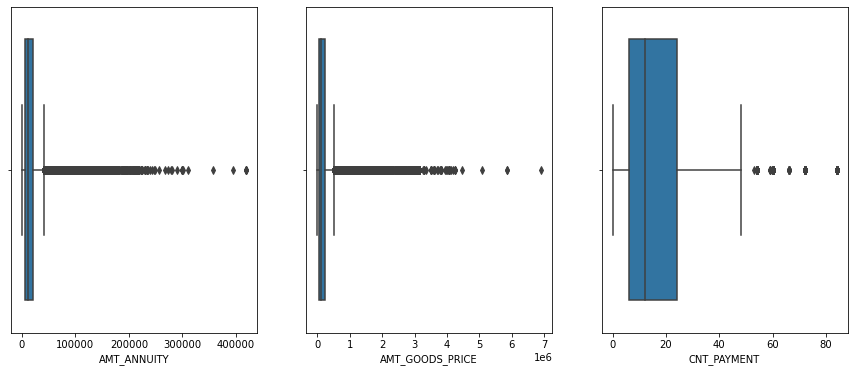

In [114]:
#getting insights of some numerical column

plt.figure(figsize=[15,6])
plt.subplot(1,3,1)
sns.boxplot(pa["AMT_ANNUITY"],)
plt.subplot(1,3,2)
sns.boxplot(pa["AMT_GOODS_PRICE"])
plt.subplot(1,3,3)
sns.boxplot(pa["CNT_PAYMENT"])

plt.show()

- Some outliers are there in the above plots

In [115]:
# check days decision column 

pa["DAYS_DECISION"].describe()

count    1.336359e+06
mean    -1.040889e+03
std      7.910910e+02
min     -2.922000e+03
25%     -1.555000e+03
50%     -7.890000e+02
75%     -4.000000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [116]:
# Convert the values into absolute and days into months

pa["DAYS_DECISION"] = abs(pa["DAYS_DECISION"])//30

In [117]:
pa["DAYS_DECISION"].describe()

count    1.336359e+06
mean     3.421354e+01
std      2.637136e+01
min      0.000000e+00
25%      1.300000e+01
50%      2.600000e+01
75%      5.100000e+01
max      9.700000e+01
Name: DAYS_DECISION, dtype: float64

<AxesSubplot:xlabel='DAYS_DECISION'>

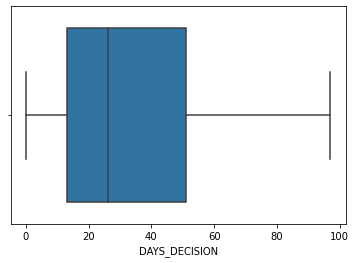

In [118]:
sns.boxplot(pa["DAYS_DECISION"])

##### Only some columns have very few null values, let them be as it is.

In [119]:
pa["NAME_CONTRACT_TYPE"].value_counts()

Consumer loans     727794
Cash loans         463576
Revolving loans    144989
Name: NAME_CONTRACT_TYPE, dtype: int64

In [120]:
pa["NAME_CONTRACT_STATUS"].value_counts()

Approved        1036781
Refused          262385
Unused offer      26433
Canceled          10760
Name: NAME_CONTRACT_STATUS, dtype: int64

In [121]:
pa["CHANNEL_TYPE"].value_counts()

Country-wide                  492937
Credit and cash offices       419221
Stone                         212058
Regional / Local              108451
AP+ (Cash loan)                51849
Contact center                 45346
Channel of corporate sales      6045
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

## Univariate Analysis

#### 1. Categorical Variable

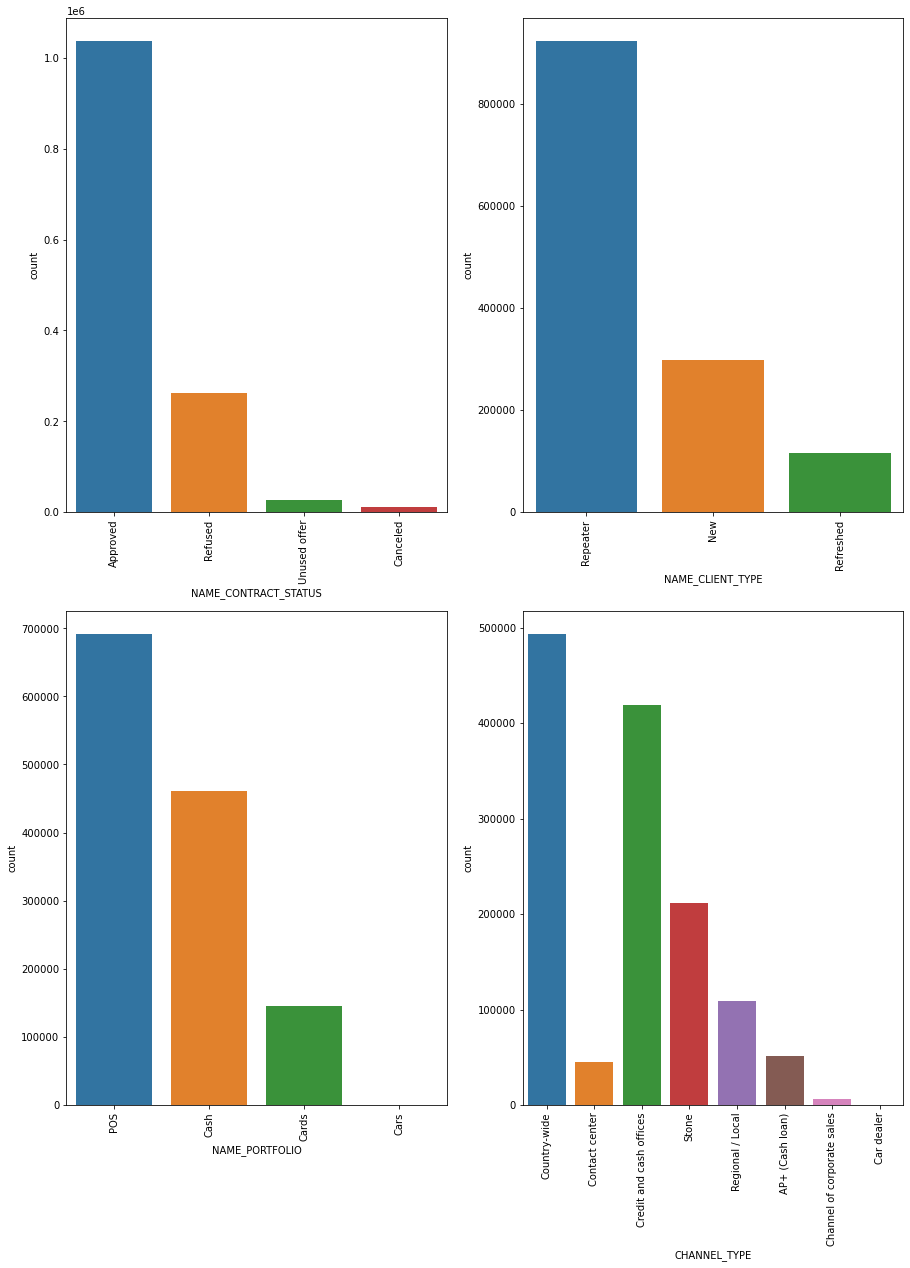

In [130]:
cat = ["NAME_CONTRACT_STATUS","NAME_CLIENT_TYPE","NAME_PORTFOLIO","CHANNEL_TYPE"]

plt.figure(figsize=[15,20])
j=1
for i in cat:
    plt.subplot(2,2,j)
    sns.countplot(x=i, data=pa)
    plt.xticks(rotation=90)
    j=j+1

plt.show()    

#### Conclusion:

1.Approved loan status is huge than rejected or canceled.  
2.Repeater clients are highest in number than new client.  
3.POS loans are highest rather than cash loans.  
4.Country-wide channel type is the most used channel followed by Credit and cash offices.

#### 2.Numerical Variable

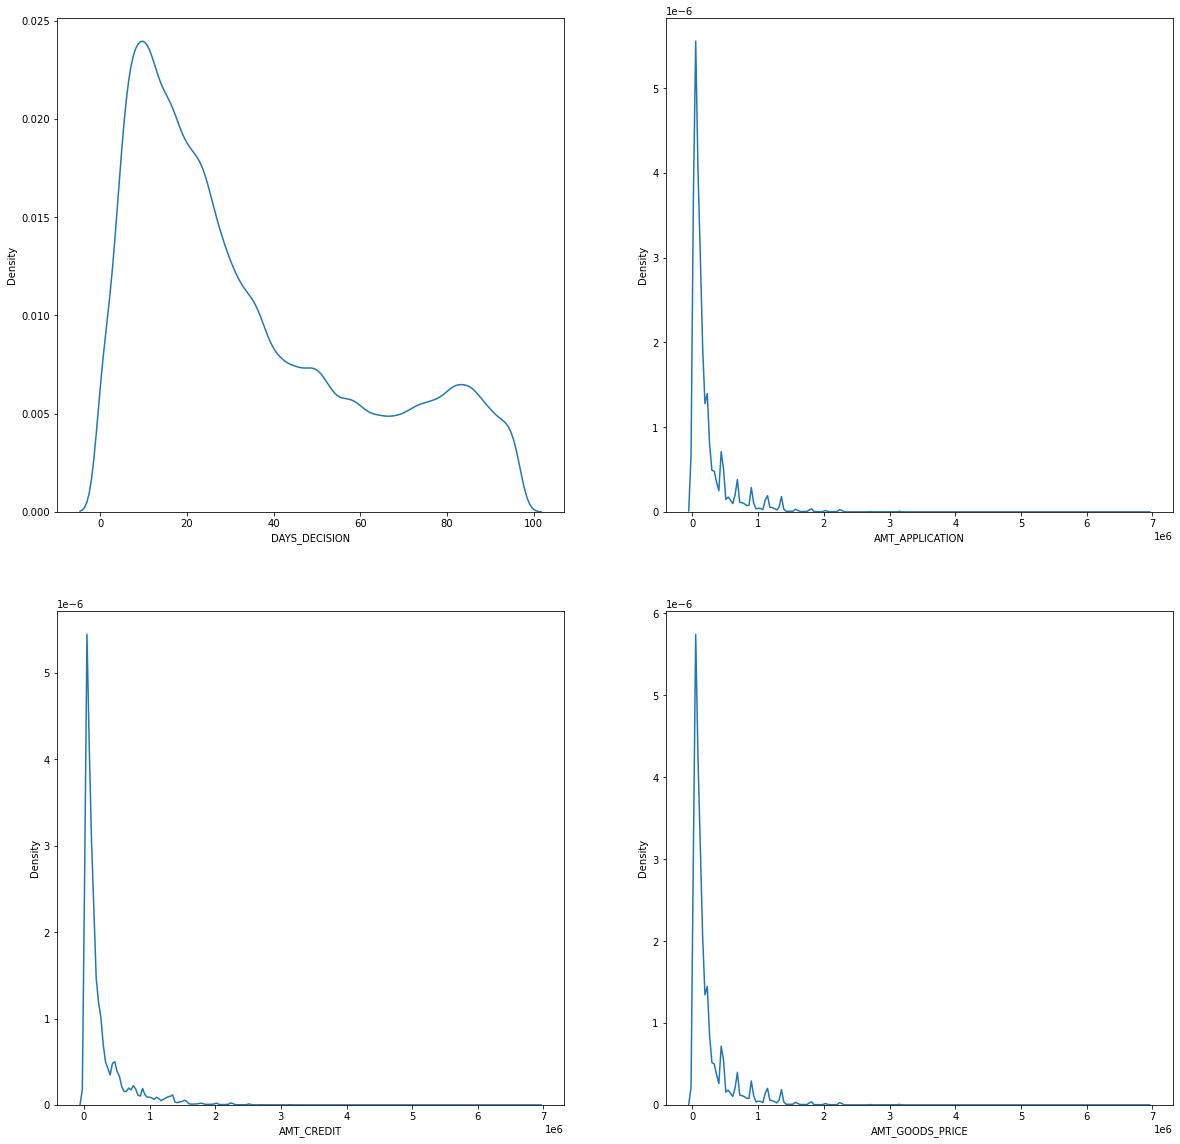

In [135]:
num = ["DAYS_DECISION","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]

plt.figure(figsize=[20,20])
j=1
for i in num:
    plt.subplot(2,2,j)
    sns.kdeplot(pa[i])
    plt.xlabel(i)
    j=j+1

plt.show()    

- Remember we converted the DAYS_DECISION  to months

#### Conclusion:

1.Most of the applications decision took around 10 to 30 months.  
2.Most of the loan application amount were below 500000, we can see a huge spike around 100000 amount.    
3.Amount credited, is also following the pattern of loan application. We already saw that most of the application was approved in previous plots.    
4.Amount of the goods price is also following the same distribution like application amount and amount credited. Becasue, based on the price of the goods, the loan was approved and amount was credited.  


## Bivariate Analysis

In [152]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336359 entries, 0 to 1670213
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1336359 non-null  int64  
 1   SK_ID_CURR            1336359 non-null  int64  
 2   NAME_CONTRACT_TYPE    1336359 non-null  object 
 3   AMT_ANNUITY           1297979 non-null  float64
 4   AMT_APPLICATION       1336359 non-null  float64
 5   AMT_CREDIT            1336358 non-null  float64
 6   AMT_GOODS_PRICE       1284699 non-null  float64
 7   NAME_CONTRACT_STATUS  1336359 non-null  object 
 8   DAYS_DECISION         1336359 non-null  int64  
 9   NAME_CLIENT_TYPE      1336359 non-null  object 
 10  NAME_PORTFOLIO        1297984 non-null  object 
 11  CHANNEL_TYPE          1336359 non-null  object 
 12  CNT_PAYMENT           1297984 non-null  float64
 13  PRODUCT_COMBINATION   1336359 non-null  object 
dtypes: float64(5), int64(3), object(6)

In [136]:
part = pa[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'CNT_PAYMENT']]

part.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,CNT_PAYMENT
0,1730.430,17145.0,17145.0,17145.0,2,12.0
1,25188.615,607500.0,679671.0,607500.0,5,36.0
2,15060.735,112500.0,136444.5,112500.0,10,12.0
3,47041.335,450000.0,470790.0,450000.0,17,12.0
4,31924.395,337500.0,404055.0,337500.0,26,24.0


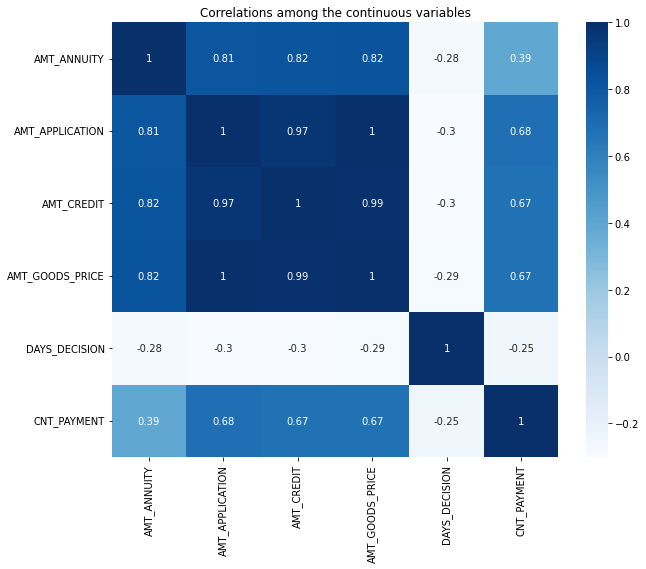

In [139]:
#Checking the top correlation of numeric columns

plt.figure(figsize = (10,8))
hmap = part.corr()
sns.heatmap(hmap, annot = True, cmap="Blues")
plt.title('Correlations among the continuous variables')
plt.show()

#### Conclusion:

1.There is a good correlation between loan application amount and credit amount & loan annuity.  
2.A good correlation between goods price amount and credit amount, if they have more goods then they have a better credit amount.  
3.Almost all columns have a bad linear correlation with days_decision.  

#### 1. Numerical-Numerical Analysis 


<Figure size 1440x576 with 0 Axes>

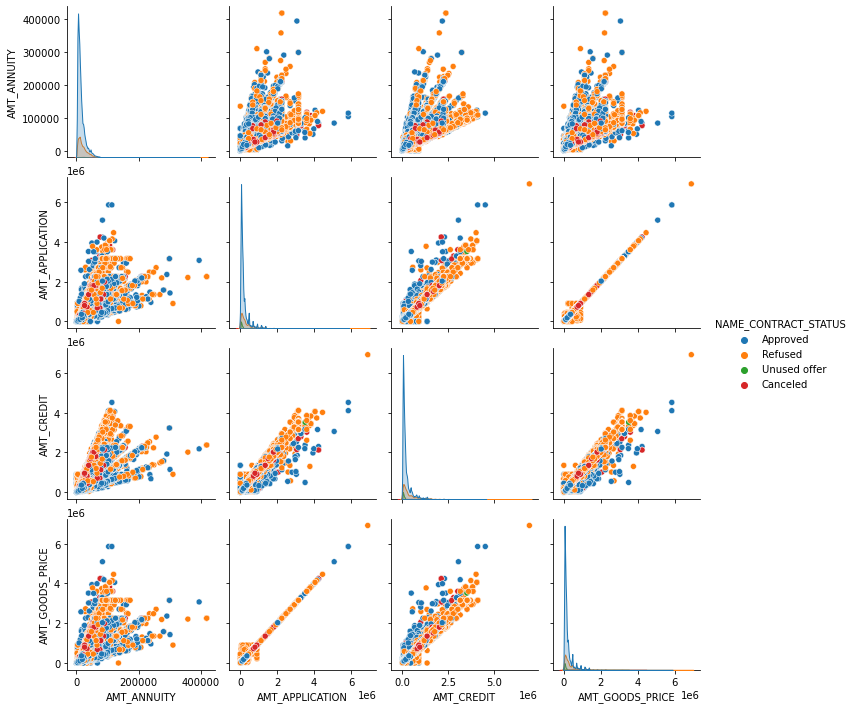

In [161]:
#plotting the relation between correlated highly corelated numeric vriables

plt.figure(figsize=[20,8])
sns.pairplot(data=pa, vars=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE'], hue="NAME_CONTRACT_STATUS")
             
             
plt.show()

#### Conclusion

1.Annuity of previous application has a very high and positive correlation over:   
(a) How much credit did client asked on the previous application.    
(b) Final credit amount on the previous application that was approved by the bank.  
(c) Goods price of good that client asked for on the previous application.  

2.For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application.High Credit loans are most likely to be refused.    

3.Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.  



#### 2. Categorical-Numerical Analysis

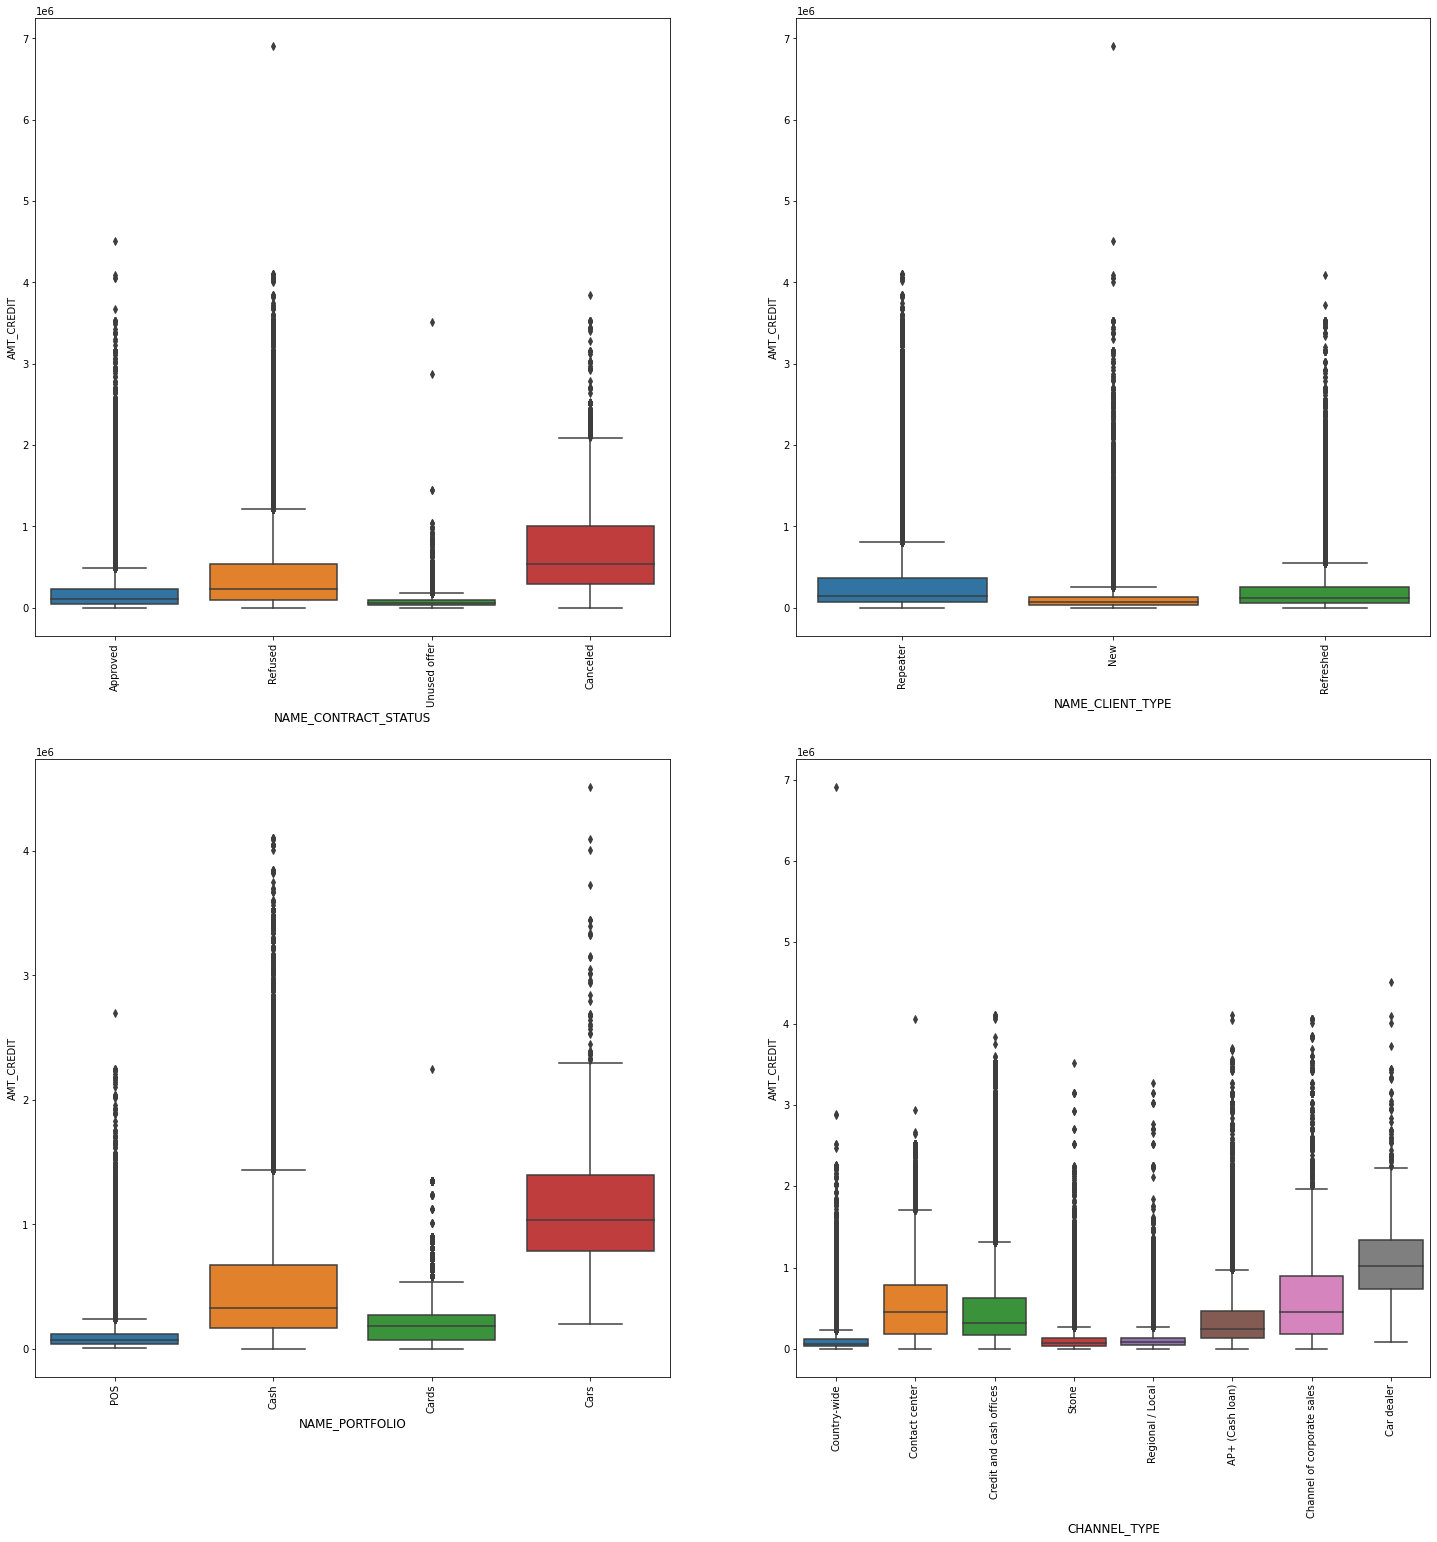

In [151]:
plt.figure(figsize=[25,25])

i=1
for col in cat:
    plt.subplot(2,2,i)
    sns.boxplot(x = col, y = 'AMT_CREDIT', data=pa)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=90)
    i += 1
plt.show()

#### Conclusion:

1.Most of the amount credit was cancelled in  contract status.Refused and Unused has an outlier.    
2.Repeater client got more loan credit.New client has an outlier.    
3.Cash loan got more credited.Cars and cards portfolio has some outliers.  
4.Through the contact center and corporate sales channel, more loan got credited.Country wise channel has an outlier.  

### Multivariate Analysis

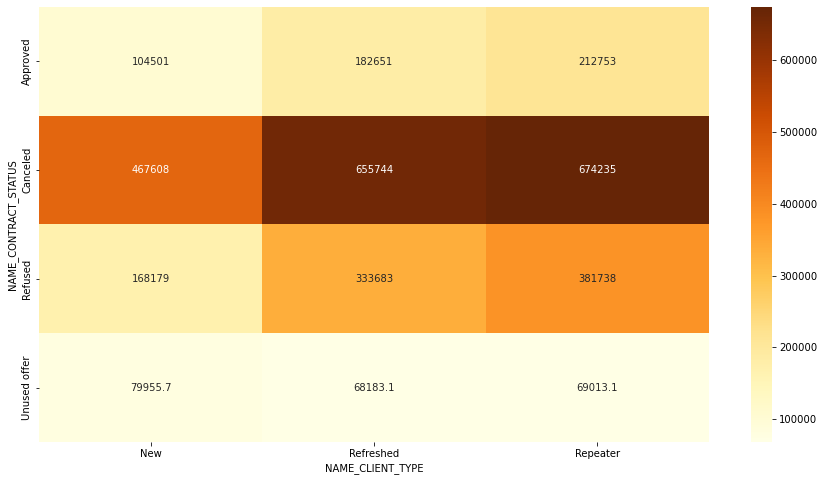

In [169]:
# Checking contract status vs name client type aggregating over application amount

sol = pd.pivot_table(data=pa, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(sol, annot=True,cmap='YlOrBr', fmt="g")
plt.show()

#### Conclusion:

1. Unused offer application amount is low
2. Cancelled application amount is high.It means more client cancelled the loan application
3. Repeater's application amount is highest than the New customers. Maybe bank has more policies or rate of interest etc for repeat applicants

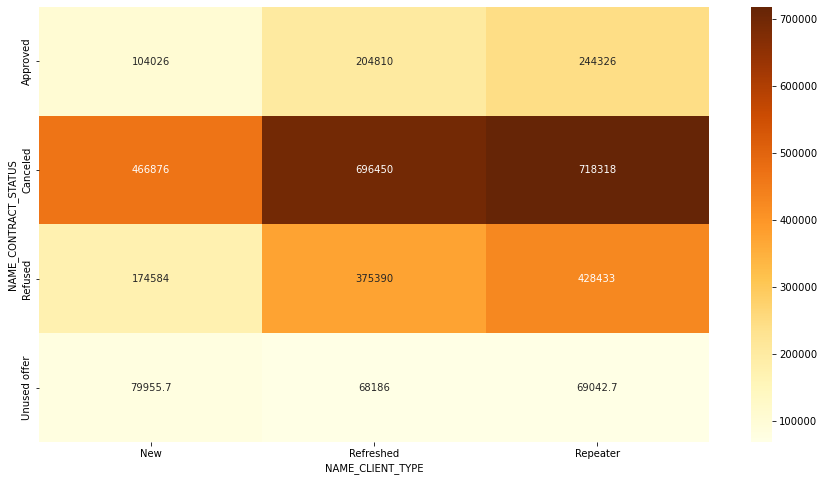

In [174]:
# Checking contract status vs name client type aggregating over AMT CREDIT

sol = pd.pivot_table(data=pa, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(sol, annot=True,cmap='YlOrBr', fmt="g")
plt.show()

#### Conclusion:

1. Unused offer CREDIT AMOUNT is low.   
2. Need to research why for cancelled and refused there should be any credit amount?  
3.Repeater's application amount is highest than the New customers. Maybe bank has more policies or rate of interest etc for repeat applicants.

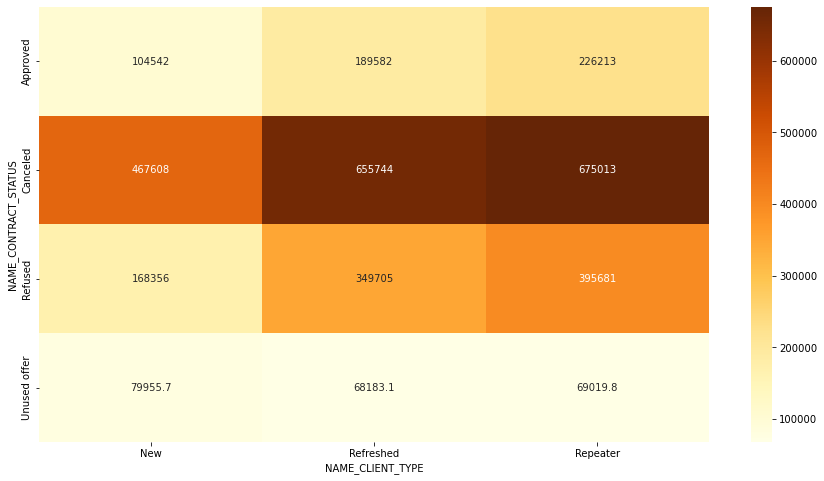

In [175]:
# Checking contract status vs name client type aggregating over AMOUNT GOOD PRICE

sol=pd.pivot_table(data=pa, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(sol, annot=True,cmap='YlOrBr', fmt="g")
plt.show()

#### Conclusion:

1. All cancelled and refused cases have higher value of goods than other categories.  
2.Again Repeater's have high goods price than all.

### Merging Application_data and Previous_application for further analysis

In [176]:
mingle = pd.merge(ad,pa, on="SK_ID_CURR", how="inner")

In [177]:
mingle.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BIN,AMT_CREDIT_BIN,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,20,New,POS,Stone,24.0,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,MONDAY,11,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,24,Repeater,Cash,Credit and cash offices,12.0,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,MONDAY,11,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,Approved,27,Refreshed,POS,Stone,6.0,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,1,1,MONDAY,11,School,0.622246,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,Approved,78,Refreshed,POS,Country-wide,12.0,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,Laborers,1.0,2,2,MONDAY,9,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,Approved,27,New,POS,Regional / Local,4.0,POS mobile without interest


In [178]:
#shape of merging dataset

mingle.shape

(1139471, 53)

In [179]:
#Checking null values for merging datasets

mingle.isnull().sum()/len(mingle)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE_x            0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT_x                    0.000000
AMT_ANNUITY_x                   0.000000
AMT_GOODS_PRICE_x               0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
YEARS_BIRTH                     0.000000
YEARS_EMPLOYED                  0.000000
YEARS_REGISTRATION              0.000000
YEARS_ID_PUBLISH                0.000000
OCCUPATION_TYPE                31.814061
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCES

## Analysis

### Income type vs contract status defaulters

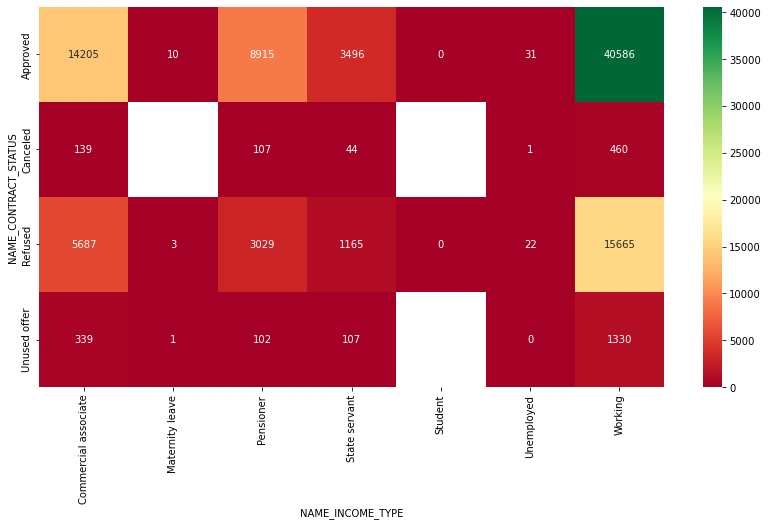

In [202]:
output1 = mingle.pivot_table(index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values="TARGET", aggfunc='sum')

plt.figure(figsize=[14,7])
sns.heatmap(output1, annot=True, cmap="RdYlGn", fmt="g")
plt.show()

#### Conclusion:

1. Since Target 1 is default, higher on the above matrix shows correlation to default.
2. Working applicant with Approved status have defaulted in highest numbers
3. Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern. This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.  
4.15,665 applicanst of working class were Refused earlier and now have defaulted.

In [199]:
# Dividing AGE and Creating new column "AGE_GROUP"

mingle['AGE_GROUP']= pd.cut(mingle.YEARS_BIRTH, bins=[15,25,35,45,55,65,75])

mingle['AGE_GROUP'].value_counts(normalize=True)

(35, 45]    0.278097
(25, 35]    0.229765
(45, 55]    0.227767
(55, 65]    0.205320
(65, 75]    0.029969
(15, 25]    0.029082
Name: AGE_GROUP, dtype: float64

### Age group vs contract status defaulters

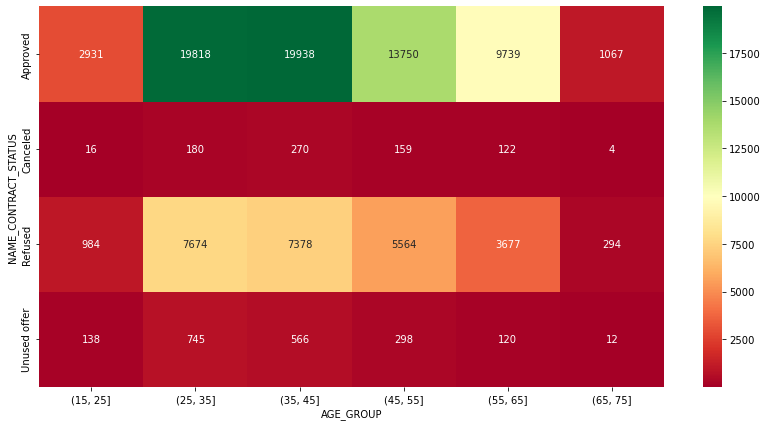

In [203]:
output2 = mingle.pivot_table(index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values="TARGET", aggfunc='sum')

plt.figure(figsize=[14,7])
sns.heatmap(output2, annot=True, cmap="RdYlGn", fmt="g")
plt.show()

#### Conclusion:

1. Since Target 1 is default, higher on the above matrix shows correlation to default.
2. Approved loans of age group 25-35 and 35-45 have higher defaults
3. Refused, cancelled, Unused loans in previous application have defaulted in current.  
4. Age group 15-25 and 65-75 have the less number of defaulters.

### Gender vs contract status defaulters

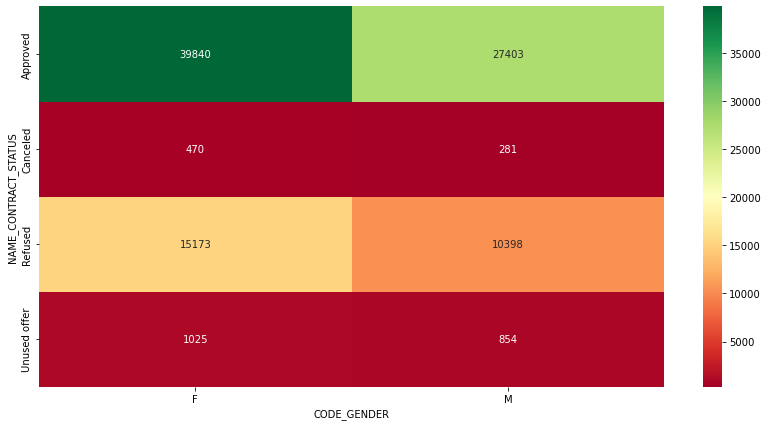

In [204]:
output3 = mingle.pivot_table(index="NAME_CONTRACT_STATUS",columns="CODE_GENDER",values="TARGET", aggfunc='sum')

plt.figure(figsize=[14,7])
sns.heatmap(output3, annot=True, cmap="RdYlGn", fmt="g")
plt.show()

#### Conclusion:

1. Approved loans of both gender have higher defaults.  
2. Cancelled loans in previous application have defaulted in current.    
3. Females are more defaulted than males.

### Family status vs contract status defaulters

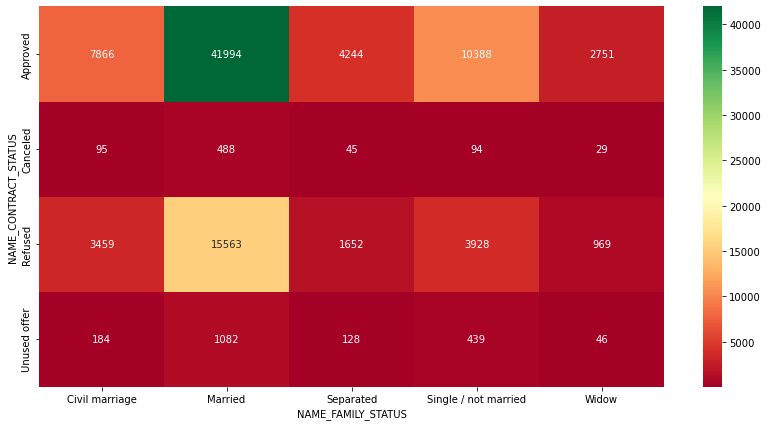

In [205]:
output4 = mingle.pivot_table(index="NAME_CONTRACT_STATUS",columns="NAME_FAMILY_STATUS",values="TARGET", aggfunc='sum')

plt.figure(figsize=[14,7])
sns.heatmap(output4, annot=True, cmap="RdYlGn", fmt="g")
plt.show()

#### Conclusion:

1. Those whose loan is Approved and Married have higher defaults.    
2. Cancelled and Unused loans in previous application have defaulted in current.This we need to check.      
3. Widows are defaulted lesser in number compare to all.

#### Analysis on Approved and default case only

In [217]:
# Check for number of defaults for approved cases

appdef = mingle[(mingle["NAME_CONTRACT_STATUS"]=="Approved")  &  (mingle["TARGET"]==1)]

appdef.shape

(67243, 54)

In [220]:
final = ['AMT_INCOME_BIN','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE",
         "NAME_EDUCATION_TYPE","NAME_CLIENT_TYPE","NAME_PORTFOLIO"]

for i in final:
    print(appdef[i].value_counts(normalize=True)*100)
    print("======================================")
    print('\n')


125000-150000       15.994230
100000-125000       14.670672
200000-225000       14.264682
150000-175000       12.563389
75000,100000        12.133605
175000-200000       10.125961
50000-75000          5.227310
250000-275000        4.202668
225000-250000        2.529631
300000-325000        1.803905
275000-300000        1.311661
350000-375000        1.087102
25000-50000          1.045462
425000-450000        0.777776
325000-350000        0.618652
500000 and above     0.542807
400000-425000        0.535372
375000-400000        0.463989
475000-500000        0.053537
450000-475000        0.047589
0-25000              0.000000
Name: AMT_INCOME_BIN, dtype: float64


(35, 45]    29.650670
(25, 35]    29.472213
(45, 55]    20.448225
(55, 65]    14.483292
(15, 25]     4.358818
(65, 75]     1.586782
Name: AGE_GROUP, dtype: float64


F    59.247803
M    40.752197
Name: CODE_GENDER, dtype: float64


Working                 60.357212
Commercial associate    21.124875
Pensioner               13.2578

#### Default cases in Approved Applications

All the below variables were established in analysis of Application dataframe as leading to default.
Checked these against the approved application and default cases and it proves to be correct.  

#### Default High

- 'AMT_INCOME_BIN' - (125000-150000)  
- 'AGE_GROUP - (25-35], followed by (35-45]  
- 'NAME_INCOME_TYPE' - Working 
- 'CODE_GENDER' - Females
- 'OCCUPATION_TYPE' - Labourers 31%  
- 'ORGANIZATION_TYPE' - Business type 3  
- 'NAME_EDUCATION_TYPE' - Secondary 80%   
- 'NAME_CLIENT_TYPE' - Repeaters 60%
- 'NAME_PORTFOLIO' - POS 59%

## Insights

- Females are having higher rate in both defaulters and non-defaulters.So bank should focus more giving loan to Female gender.
- Banks should focus less on Income type Working category, as they are the highest defaulters.
- Those having Medium income range(50k-200k) are defaulters. Bank should keep eye on them while giving loans.
- In Occupation type - Labourers, Salesman, Drivers are defaulters.
- Bank should focus more on Business type 3 in Organization type, as they have higher rate in both defaulters and non-defaulters.
- In Age group , 25-35 yr old followed by 35-45 are defaulters but bank approved their previous loan.
- Secondary education people are defaulters.
- In Client type, Repeaters client are defaulters but bank approved their  previous loan showed bank are giving special offers/rate of interest to them.
- In NAME_FAMILY_STATUS, Married followed by Single/not married has high rate in defaulters and non-defaulters.
- Income amount is inversely proportional to the number of children client have, means more income if client has less children and vice-versa.
- Attract as much clients from housing type with parents as they are having less number of un-successful attempts.
- Price of goods for which loan is given has a good linear relationship with credit amount.      
